### Show Mapping Results

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path_mapping_stats = "../../data/mapping_stats_2pass/"

In [3]:
def LogParser(file_path:str) -> pd.DataFrame:
    """Parse out Single Log

    Args:
        file_path (str): path for log file

    Returns:
        pd.DataFrame: a dataframe that stores parsed log data
    """
    
    row_name = file_path.split('/')[-1][:-14]
    
    with open(file_path, 'r') as log:
        cols = []
        rows = []
        
        idx = 0
        while True:
            line = log.readline().strip()  # remove heading and tailing whitespaces
            
            if idx < 5:  # skip first 5 lines (useless info)
                idx += 1
                continue
            
            if not line:  # empty line below 5th line means end of file
                break
            
            if '|' not in line:  # line without '|' means simple informative row
                continue
            
            col, row = line.split('|')
            cols.append(col.strip())  # remove heading and tailing whitespaces
            rows.append(row.strip())  # remove heading and tailing whitespaces
    
    return pd.DataFrame({c:r for c, r in zip(cols, rows)}, index=[row_name])

In [4]:
def MultiLogParser(file_path: str) -> pd.DataFrame:
    """Parse out Multiple Log files=

    Args:
        file_path (str): path where all the log files are in

    Returns:
        pd.DataFrame: a dataframe that contains all the information of log files
    """
    
    res_df = pd.DataFrame()  # empty dataframe
    
    fnames = os.listdir(file_path)
    
    for fname in fnames:
        fpath = os.path.join(file_path, fname)
        res_df = pd.concat([res_df, LogParser(fpath)])
    
    return res_df

In [5]:
mapping_stats = MultiLogParser(path_mapping_stats)
mapping_stats.sort_index(inplace=True)

In [6]:
mapping_stats.head()

,Number of input reads,Average input read length,Uniquely mapped reads number,Uniquely mapped reads %,Average mapped length,Number of splices: Total,Number of splices: Annotated (sjdb),Number of splices: GT/AG,Number of splices: GC/AG,Number of splices: AT/AC,...,Number of reads mapped to too many loci,% of reads mapped to too many loci,Number of reads unmapped: too many mismatches,% of reads unmapped: too many mismatches,Number of reads unmapped: too short,% of reads unmapped: too short,Number of reads unmapped: other,% of reads unmapped: other,Number of chimeric reads,% of chimeric reads
CCI4_1x_4,52412998,201,44523154,84.95%,200.98,27888396,27859414,27644384,212711,13409,...,102305,0.20%,0,0.00%,1566278,2.99%,325180,0.62%,0,0.00%
CCI4_1x_6,64622725,201,52466365,81.19%,200.62,33446588,33400107,33146634,253033,16715,...,109004,0.17%,0,0.00%,4137571,6.40%,574642,0.89%,0,0.00%
CCI4_1x_9,56679431,201,46860370,82.68%,200.81,31128943,31103070,30848081,243706,15129,...,105617,0.19%,0,0.00%,2896910,5.11%,255388,0.45%,0,0.00%
CCI4_3x_2,56709978,201,46177111,81.43%,200.90,29902198,29876398,29631934,236187,12394,...,133055,0.23%,0,0.00%,2876273,5.07%,217958,0.38%,0,0.00%
CCI4_3x_5,56879454,201,47593658,83.67%,200.92,31325761,31299274,31040622,246775,15271,...,142645,0.25%,0,0.00%,2340089,4.11%,201943,0.36%,0,0.00%


In [7]:
mapping_stats_core = mapping_stats[
    ['Uniquely mapped reads %',
     '% of reads mapped to multiple loci',
     '% of reads mapped to too many loci',
     '% of reads unmapped: too short',
     '% of reads unmapped: other']
].copy()

for column in mapping_stats_core.columns:
    mapping_stats_core[column] = mapping_stats_core[column].map(lambda x: float(x[:-1]))

mapping_stats_summary = mapping_stats_core.copy()

mapping_stats_summary.columns = [
    'uniquely_mapped',
    'multiple_loci',
    'too_many_loci',
    'too_short_loci',
    'other_reason'
]

mapping_stats_summary['multi_mapped'] = mapping_stats_summary['multiple_loci'] + mapping_stats_summary['too_many_loci']
mapping_stats_summary['unmapped'] = mapping_stats_summary['too_short_loci'] + mapping_stats_summary['other_reason']

mapping_stats_summary = mapping_stats_summary.drop(['multiple_loci', 
                                                    'too_many_loci',
                                                    'too_short_loci',
                                                    'other_reason'],
                                                   axis=1)

mapping_stats_summary.head()

,uniquely_mapped,multi_mapped,unmapped
CCI4_1x_4,84.95,11.45,3.61
CCI4_1x_6,81.19,11.52,7.29
CCI4_1x_9,82.68,11.77,5.56
CCI4_3x_2,81.43,13.11,5.45
CCI4_3x_5,83.67,11.86,4.47


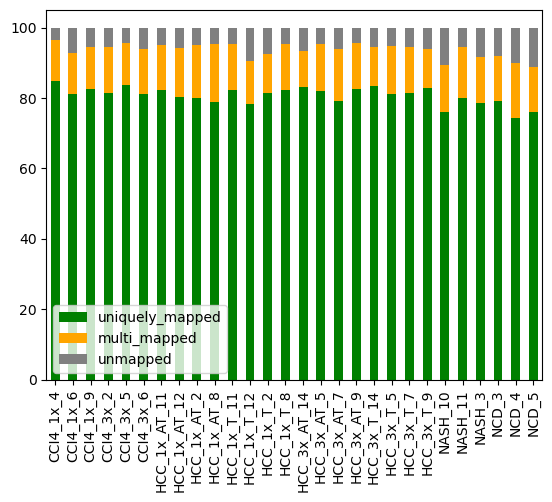

In [8]:
mapping_stats_summary.plot(kind='bar', stacked=True, color=['green', 'orange', 'grey']);

In [9]:
mapping_stats_summary_sorted = mapping_stats_summary.sort_values(by='uniquely_mapped', ascending=False)
mapping_stats_summary_sorted.head()

,uniquely_mapped,multi_mapped,unmapped
CCI4_1x_4,84.95,11.45,3.61
CCI4_3x_5,83.67,11.86,4.47
HCC_3x_T_14,83.51,10.92,5.57
HCC_3x_AT_14,83.17,10.27,6.56
HCC_3x_T_9,82.81,11.24,5.95


In [10]:
mapping_stats_summary_sorted.tail(10)

,uniquely_mapped,multi_mapped,unmapped
HCC_1x_AT_2,80.09,14.92,4.99
NASH_11,80.00,14.48,5.52
HCC_3x_AT_7,79.17,14.66,6.17
NCD_3,79.05,12.97,7.98
HCC_1x_AT_8,78.75,16.62,4.63
NASH_3,78.47,13.07,8.46
HCC_1x_T_12,78.16,12.22,9.62
NASH_10,76.08,13.31,10.61
NCD_5,75.98,12.90,11.12
NCD_4,74.40,15.45,10.15


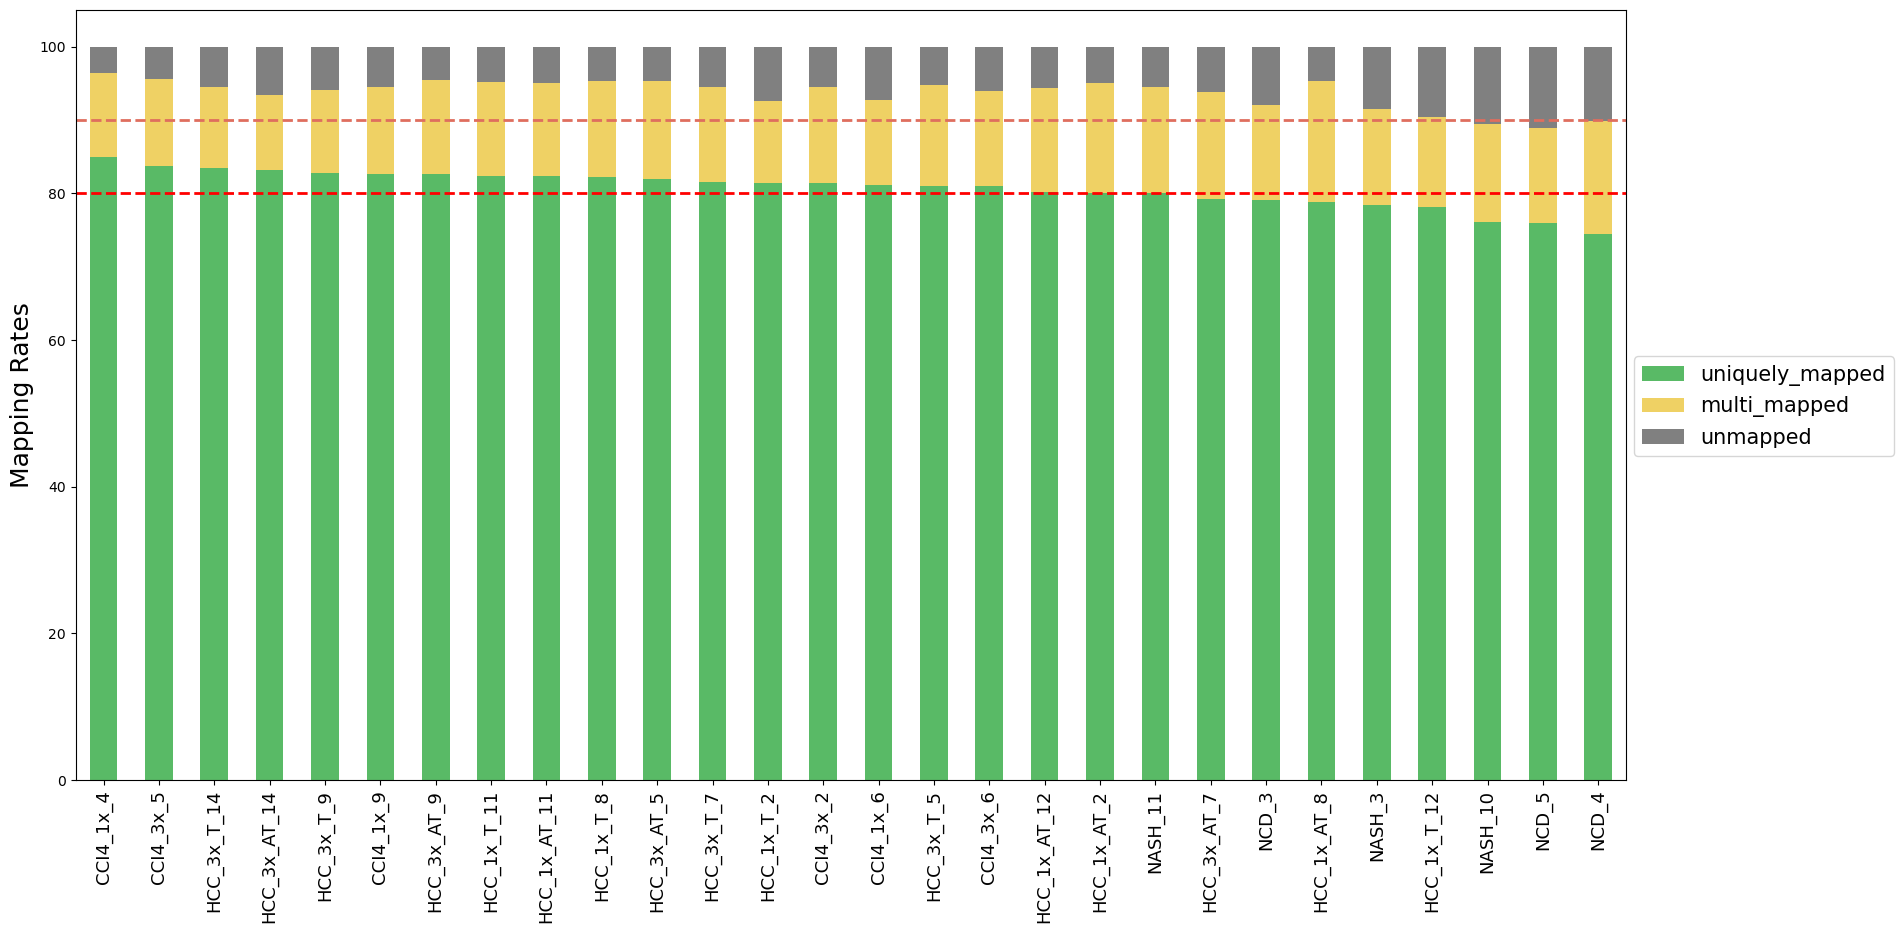

In [11]:
plot = mapping_stats_summary_sorted.plot(kind='bar', stacked=True, color=['#59BA66', '#EFD164', 'grey'], figsize=(20, 10))
plot.axhline(90, color='#DF6E5E', linewidth=2, linestyle='--')
plot.axhline(80, color='red', linewidth=2, linestyle='--')
plt.xticks(fontsize=13)
plt.ylabel("Mapping Rates", fontsize=18)
plt.legend(bbox_to_anchor=(1.005, 0.55), loc='upper left', borderaxespad=0, fontsize=15);

### Show Sample Quality

In [12]:
import numpy as np

path_rsem_result = "../../data/rsem_result/"

In [111]:
def CountExtractor(file_path: str) -> list:
    """Extract count values from rsem results

    Args:
        file_path (str): a path where all the rsem results are in

    Returns:
        list: a list containing dataframes of expected_count, tpm, fpkm
    """
    
    cnt_df = pd.DataFrame()
    tpm_df = pd.DataFrame()
    fpkm_df = pd.DataFrame()
    
    rsem_results = os.listdir(file_path)
    
    first = True
    for rsem in rsem_results:
        temp = pd.read_csv(os.path.join(file_path, rsem), sep='\t')
        temp.index = temp['gene_id']
        
        if first:
            first = False
        else:
            if all(temp.index != cnt_df.index):
                print("Error, Index not matching!!\n")
                break
        
        name = rsem[:-14]
        
        cnt_df[name] = temp['expected_count']
        tpm_df[name] = temp['TPM']
        fpkm_df[name] = temp['FPKM']
    
    return [cnt_df, tpm_df, fpkm_df, temp['length']]

In [193]:
cnt, tpm, fpkm, length = CountExtractor(path_rsem_result)

In [113]:
length.head()

gene_id
ENSMUSG00000000001.5     3262.00
ENSMUSG00000000003.16     799.50
ENSMUSG00000000028.16    1860.91
ENSMUSG00000000031.17    2072.07
ENSMUSG00000000037.18    2094.78
Name: length, dtype: float64

In [15]:
tpm.head()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001.5,25.47,27.03,19.52,22.94,24.70,22.09,20.10,16.10,19.53,17.09,...,17.09,15.14,18.37,15.13,19.92,22.32,22.29,16.16,21.00,20.39
ENSMUSG00000000003.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSMUSG00000000028.16,0.81,0.64,0.47,0.69,0.76,0.39,0.49,0.34,0.45,0.57,...,0.27,0.41,1.24,0.63,0.73,0.70,0.56,0.68,0.90,0.59
ENSMUSG00000000031.17,32.93,126.38,54.87,13.31,37.11,0.48,30.43,36.78,0.00,3.13,...,1.95,0.45,1.12,0.08,27.88,53.51,11.83,6.13,0.83,178.22
ENSMUSG00000000037.18,0.04,0.09,0.09,0.04,0.05,0.01,0.03,0.04,0.00,0.01,...,0.13,0.02,0.14,0.00,0.66,0.05,0.01,0.02,0.08,0.05


/Users/jigsaw-0/mambaforge/envs/ML/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


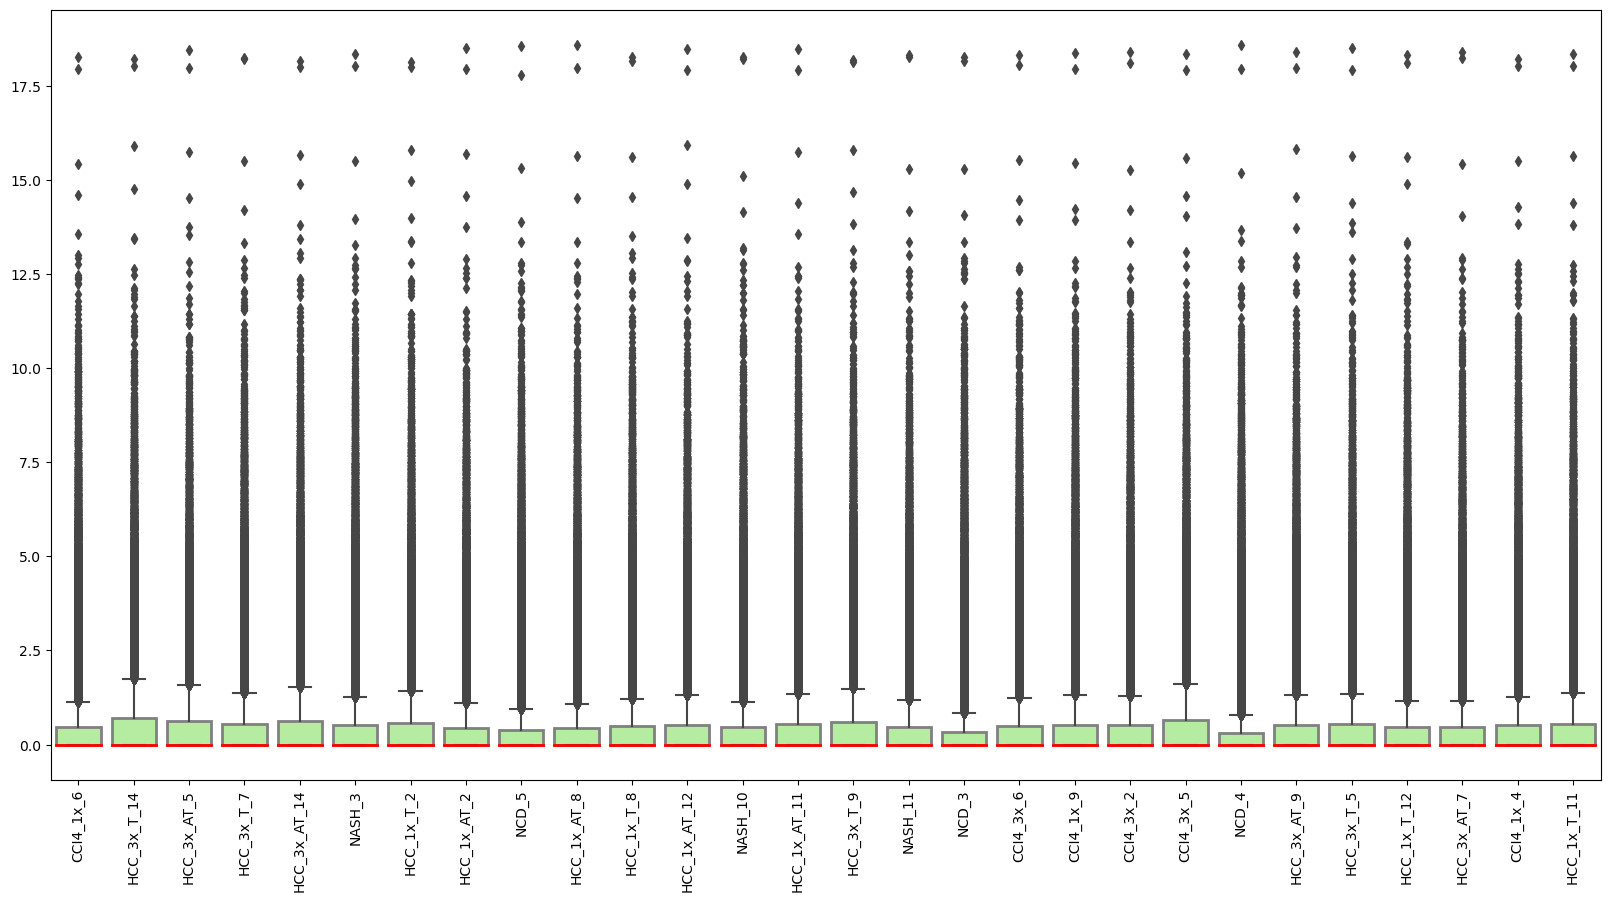

In [439]:
log_tpm = np.log2(tpm+1)
#plt.ylim([0, 1])
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
boxpl = sns.boxplot(data=log_tpm,
                    boxprops={'edgecolor':'grey', 'facecolor': '#B6ECA2', 'linewidth':2},
                    medianprops={'color':'red', 'linewidth':2});

/Users/jigsaw-0/mambaforge/envs/ML/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


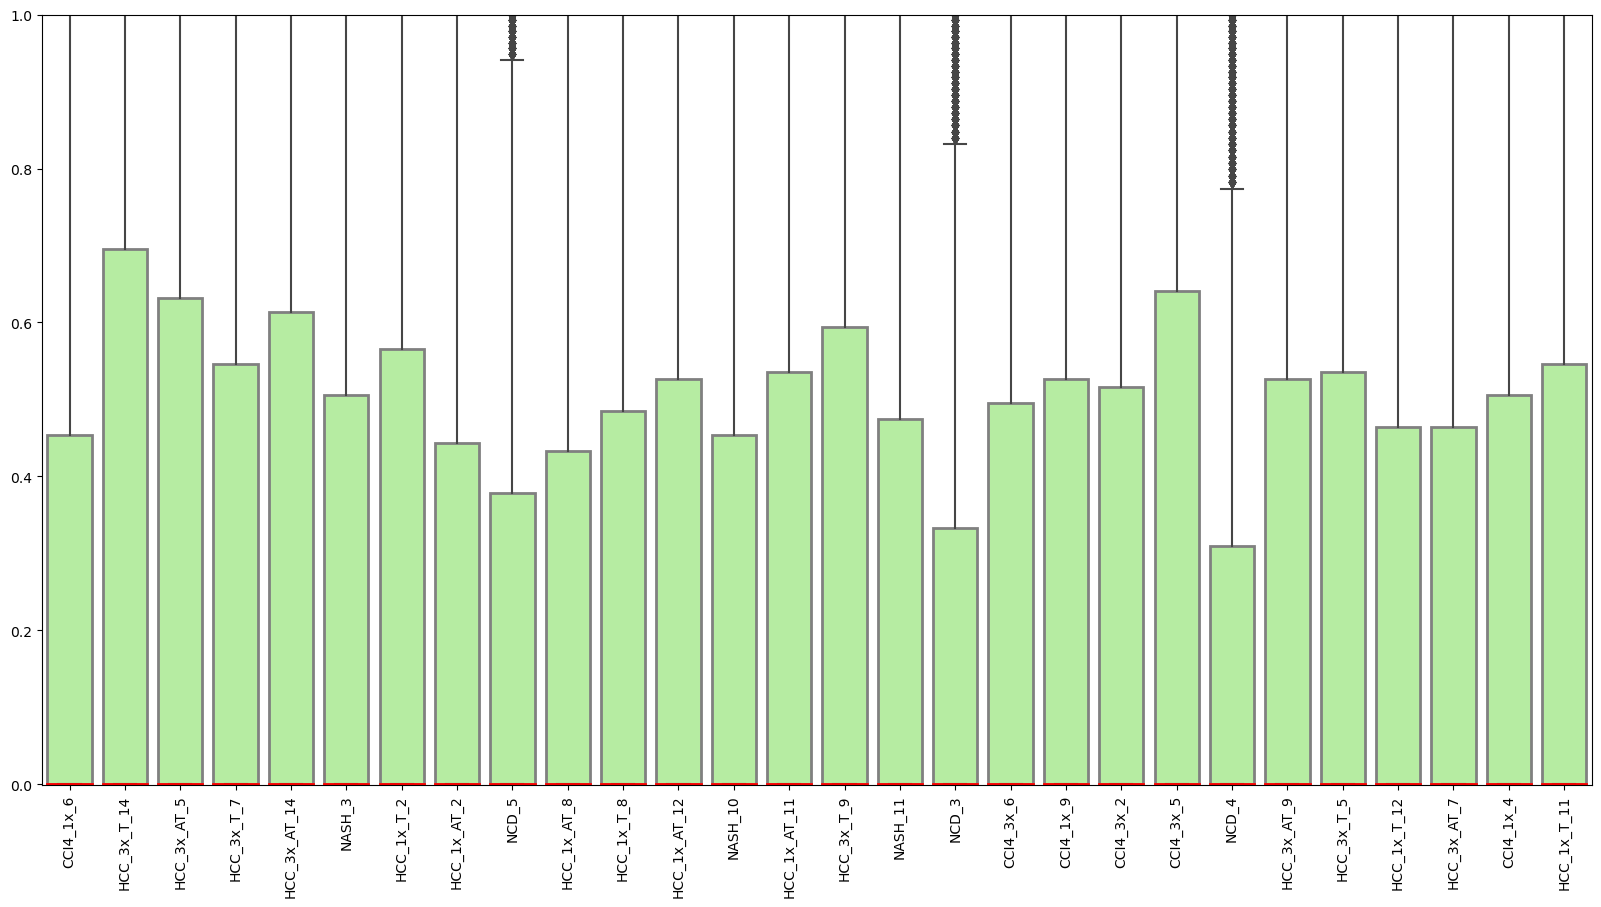

In [442]:
plt.figure(figsize=(20, 10))
plt.ylim([-0.0001, 1])
plt.xticks(rotation=90)
boxpl = sns.boxplot(data=log_tpm,
                    boxprops={'edgecolor':'grey', 'facecolor': '#B6ECA2', 'linewidth':2},
                    medianprops={'color':'red', 'linewidth':2})

(0.0, 1.0)

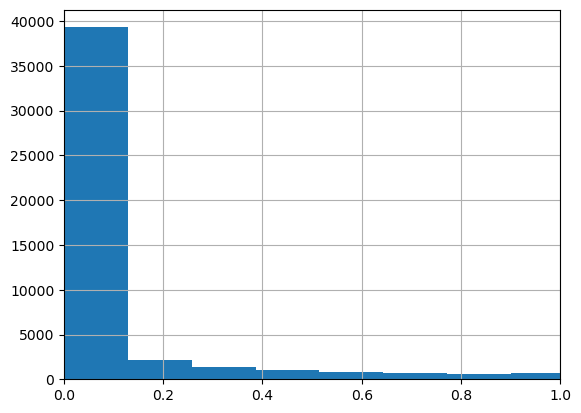

In [89]:
np.log(tpm['NCD_5']+1).hist(bins=100)
plt.xlim([0, 1])

In [90]:
log_tpm_test = log_tpm.copy()

log_tpm_test = log_tpm_test[(log_tpm_test > 0.1).sum(axis=1) != 0]

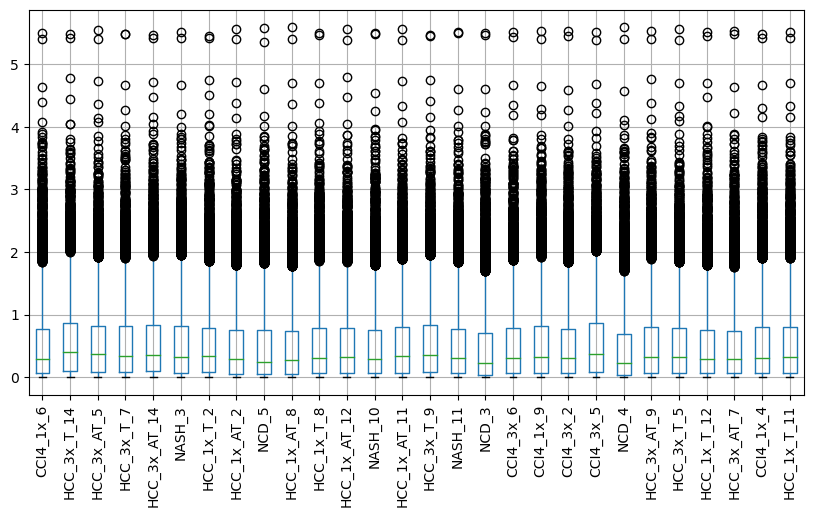

In [91]:
log_tpm_test.boxplot(figsize=(10, 5))
plt.xticks(rotation=90);

<AxesSubplot: >

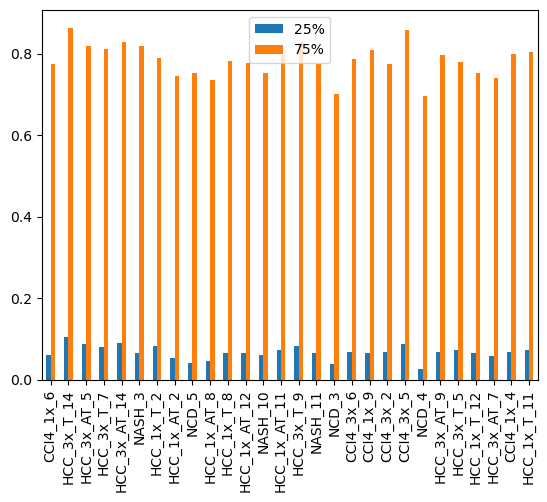

In [110]:
log_tpm_test.describe().loc[['25%','75%']].transpose().plot(kind='bar', stacked=False)

<AxesSubplot: >

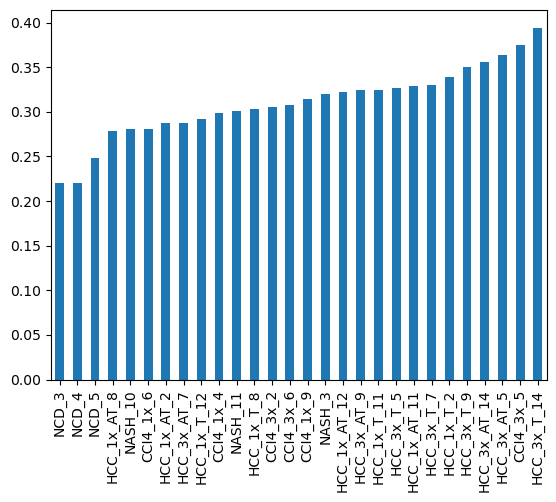

In [104]:
log_tpm_test.median().sort_values(ascending=True).plot(kind='bar')

<AxesSubplot: >

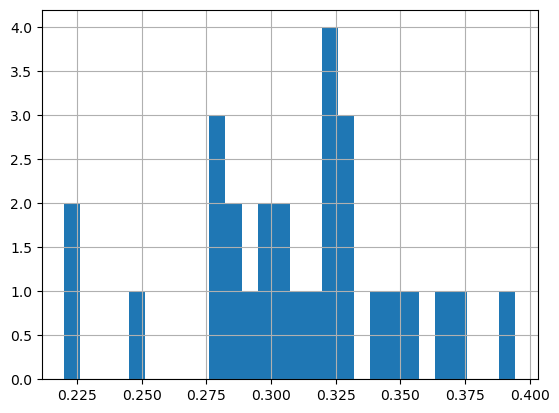

In [96]:
log_tpm_test.describe().loc['50%', :].hist(bins=28)

In [83]:
log_tpm_test.median().sort_values(ascending=True)

NCD_4           0.060698
NCD_3           0.068186
NCD_5           0.075547
HCC_1x_AT_8     0.086360
HCC_1x_AT_2     0.089905
NASH_10         0.093422
CCI4_1x_6       0.093422
HCC_1x_T_12     0.096910
HCC_3x_AT_7     0.096910
HCC_1x_T_8      0.100371
NASH_11         0.100371
CCI4_3x_6       0.103804
NASH_3          0.103804
CCI4_1x_4       0.107210
HCC_3x_AT_9     0.110590
HCC_1x_AT_12    0.110590
CCI4_3x_2       0.110590
CCI4_1x_9       0.110590
HCC_3x_T_5      0.113943
HCC_1x_AT_11    0.113943
HCC_1x_T_11     0.113943
HCC_3x_T_7      0.117271
HCC_1x_T_2      0.123852
HCC_3x_T_9      0.127105
HCC_3x_AT_14    0.130334
CCI4_3x_5       0.133539
HCC_3x_AT_5     0.133539
HCC_3x_T_14     0.152288
dtype: float64

#### Let's filter TPM values with MAD

In [208]:
from statsmodels.robust import mad

In [194]:
tpm.head()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001.5,25.47,27.03,19.52,22.94,24.70,22.09,20.10,16.10,19.53,17.09,...,17.09,15.14,18.37,15.13,19.92,22.32,22.29,16.16,21.00,20.39
ENSMUSG00000000003.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSMUSG00000000028.16,0.81,0.64,0.47,0.69,0.76,0.39,0.49,0.34,0.45,0.57,...,0.27,0.41,1.24,0.63,0.73,0.70,0.56,0.68,0.90,0.59
ENSMUSG00000000031.17,32.93,126.38,54.87,13.31,37.11,0.48,30.43,36.78,0.00,3.13,...,1.95,0.45,1.12,0.08,27.88,53.51,11.83,6.13,0.83,178.22
ENSMUSG00000000037.18,0.04,0.09,0.09,0.04,0.05,0.01,0.03,0.04,0.00,0.01,...,0.13,0.02,0.14,0.00,0.66,0.05,0.01,0.02,0.08,0.05


In [230]:
filtered_tpm = tpm[(tpm >= 1).sum(axis=1) == 28]

In [202]:
filtered_tpm = tpm[(tpm > 3).sum(axis=1) >= 14]

In [231]:
tpm.shape, filtered_tpm.shape

((55414, 28), (8537, 28))

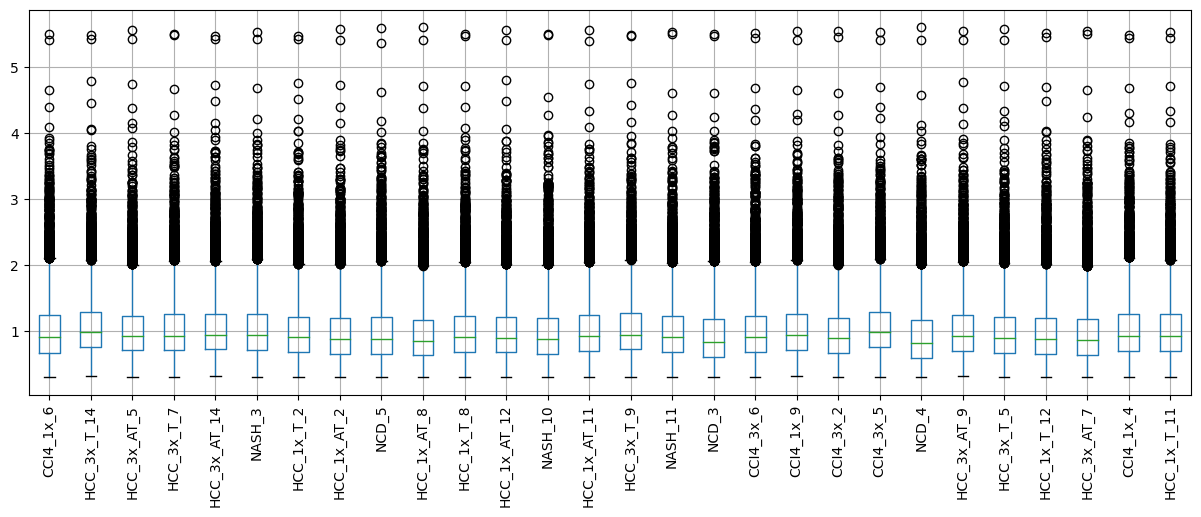

In [235]:
np.log10(filtered_tpm+1).boxplot(figsize=(15, 5))
plt.xticks(rotation=90);

In [233]:
filtered_tpm.describe()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
count,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,...,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000,8537.000000
mean,114.724647,114.133846,114.722557,115.094288,114.209858,114.264593,112.672213,115.078641,114.814188,115.199205,...,115.151807,114.932154,114.607169,114.843942,114.644409,115.023102,114.849277,115.356125,114.770835,114.499793
std,4408.855329,4436.167628,4862.833146,4733.764303,4325.799424,4657.852755,4308.861852,4940.434006,4886.594463,5149.424332,...,4646.438003,4888.821780,4544.131035,5078.403910,4693.314756,4920.377650,4702.028465,5046.981789,4435.078523,4695.531914
min,1.020000,1.080000,1.000000,1.030000,1.100000,1.000000,1.030000,1.000000,1.000000,1.000000,...,1.060000,1.010000,1.010000,1.000000,1.080000,1.000000,1.010000,1.000000,1.030000,1.030000
25%,3.670000,4.720000,4.070000,4.090000,4.350000,4.200000,3.850000,3.390000,3.470000,3.260000,...,4.160000,3.680000,4.700000,2.940000,3.900000,3.670000,3.530000,3.380000,3.970000,4.030000
50%,7.020000,8.460000,7.400000,7.490000,7.780000,7.780000,7.020000,6.410000,6.490000,6.090000,...,7.580000,6.810000,8.490000,5.520000,7.230000,6.720000,6.510000,6.230000,7.350000,7.370000
75%,16.390000,18.250000,15.830000,16.700000,17.140000,17.280000,15.460000,14.570000,15.390000,13.820000,...,17.130000,14.890000,18.410000,13.450000,16.130000,15.320000,14.790000,14.080000,17.270000,16.820000
max,314522.350000,304418.900000,361556.280000,309280.020000,292822.480000,334592.430000,290051.280000,375233.600000,388530.620000,396889.830000,...,341493.080000,348672.410000,333341.170000,391846.300000,344169.130000,374949.270000,325819.300000,343251.420000,303581.160000,335634.310000


In [234]:
mad(filtered_tpm)

array([6.2121033 , 7.0868386 , 6.19727727, 6.31588545, 6.56792783,
       6.62723192, 5.88593081, 5.51528025, 5.75249661, 5.26323788,
       6.13797318, 5.87110479, 5.5449323 , 6.06384307, 6.56792783,
       5.88593081, 5.23358583, 6.13797318, 6.40484158, 5.75249661,
       7.07201258, 4.93706539, 6.15279921, 5.84145274, 5.64871445,
       5.32254196, 6.39001556, 6.28623341])

In [239]:
filtered_idx = set()
for col in filtered_tpm.columns:
    criteria = (filtered_tpm[col] >= np.median(filtered_tpm[col]) - 3*mad(filtered_tpm[col])) & \
        (filtered_tpm[col] <= np.median(filtered_tpm[col]) + 3*mad(filtered_tpm[col]))
    tmp_idx = filtered_tpm[col][criteria].index
    
    if not filtered_idx:
        filtered_idx = set(tmp_idx)
    else:
        filtered_idx = filtered_idx & set(tmp_idx)

mad_filtered_tpm = filtered_tpm.loc[list(filtered_idx), :]

In [240]:
mad_filtered_tpm.describe()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
count,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,...,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000,6556.000000
mean,6.558258,7.928315,6.934228,6.966431,7.289426,7.236541,6.522993,5.932305,6.184460,5.700624,...,7.133269,6.339616,7.882894,5.369271,6.683848,6.387701,6.064062,5.800857,6.974487,6.890863
std,4.480290,5.074800,4.518283,4.476975,4.627765,4.716576,4.153674,3.953187,4.265683,3.799142,...,4.672712,4.132375,5.051469,3.802360,4.335184,4.349606,3.996894,3.780575,4.723154,4.540384
min,1.020000,1.080000,1.000000,1.030000,1.100000,1.000000,1.030000,1.000000,1.000000,1.000000,...,1.060000,1.010000,1.010000,1.000000,1.080000,1.000000,1.010000,1.000000,1.030000,1.030000
25%,3.140000,4.067500,3.500000,3.550000,3.770000,3.620000,3.330000,2.920000,2.960000,2.820000,...,3.610000,3.190000,4.077500,2.500000,3.370000,3.120000,3.010000,2.930000,3.397500,3.470000
50%,5.170000,6.480000,5.650000,5.620000,5.920000,5.810000,5.270000,4.750000,4.890000,4.580000,...,5.710000,5.120000,6.420000,4.185000,5.400000,5.070000,4.820000,4.670000,5.540000,5.530000
75%,8.680000,10.490000,9.232500,9.350000,9.640000,9.720000,8.600000,7.930000,8.300000,7.612500,...,9.520000,8.472500,10.462500,7.240000,8.930000,8.490000,8.060000,7.742500,9.245000,9.200000
max,25.170000,29.700000,25.780000,26.290000,27.080000,27.340000,24.320000,22.930000,23.390000,21.860000,...,26.660000,23.930000,29.440000,20.310000,25.520000,24.240000,22.840000,21.640000,25.840000,26.020000


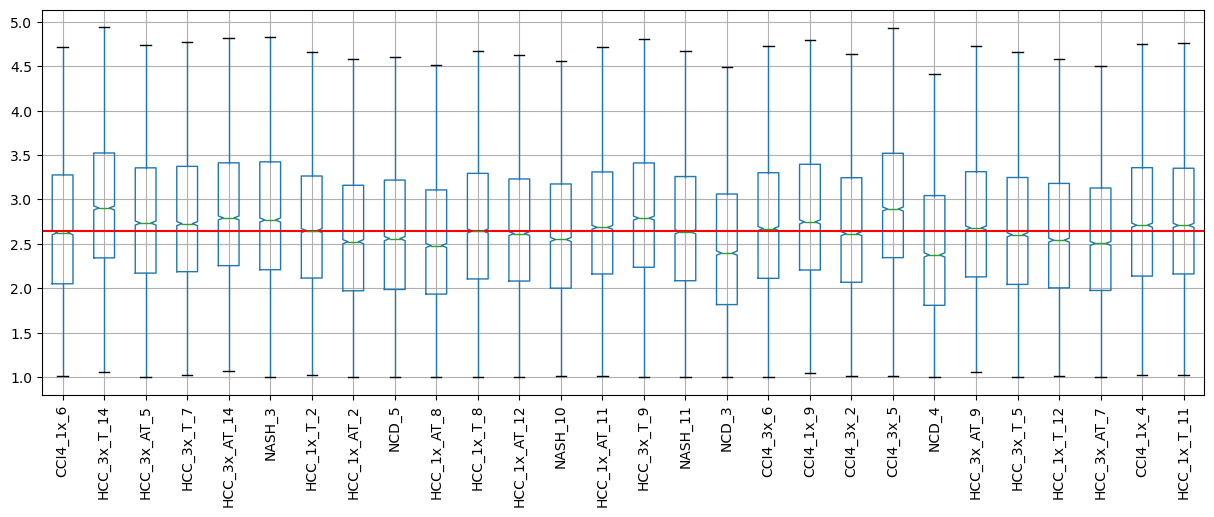

In [252]:
np.log2(mad_filtered_tpm+1).boxplot(figsize=(15, 5), notch=True)
plt.xticks(rotation=90)
plt.axhline(np.mean(np.median(np.log2(mad_filtered_tpm+1))), color='red');

#### Let's start over from the expected count values

/Users/jigsaw-0/mambaforge/envs/ML/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


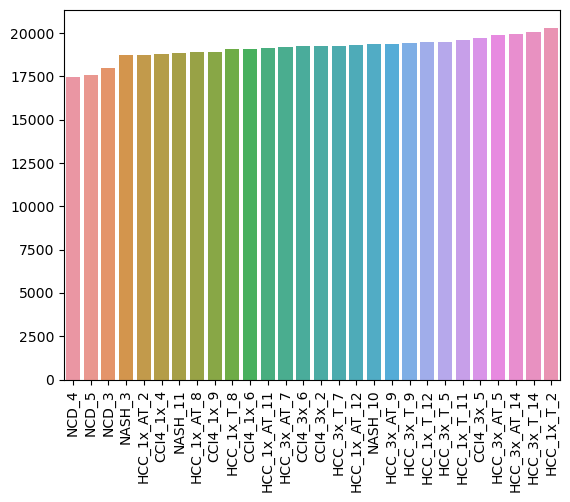

In [268]:
sns.barplot(pd.DataFrame((cnt > 5).sum(axis=0).sort_values(ascending=True)).transpose())
plt.xticks(rotation=90);

In [290]:
pd.DataFrame((cnt > 3).sum(axis=1).sort_values(ascending=True)).head()

,0
gene_id,
ENSMUSG00002076992.1,0
ENSMUSG00000074547.5,0
ENSMUSG00000100916.4,0
ENSMUSG00000100917.2,0
ENSMUSG00000100918.2,0


In [279]:
cnt_filt1 = cnt[(cnt > 3).sum(axis=1) > 0]
cnt_filt1.shape

(29001, 28)

<AxesSubplot: >

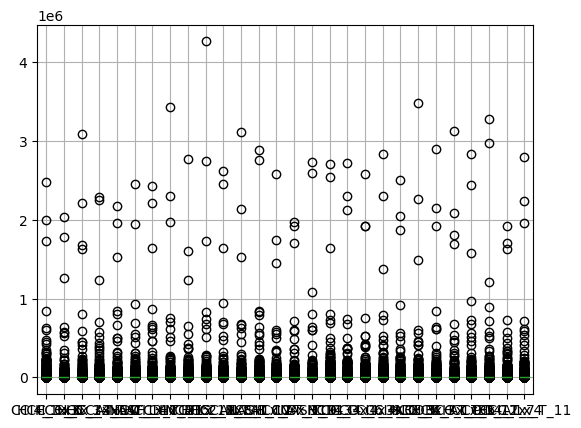

In [281]:
cnt_filt1.boxplot()

In [289]:
pd.DataFrame((cnt_filt1 > 3).sum(axis=1).sort_values(ascending=True)).value_counts()

28    14655
1      2808
2      1370
27     1008
3       900
4       642
26      640
5       590
6       467
25      463
7       416
23      399
8       377
24      368
10      325
9       319
22      305
20      295
18      293
12      289
21      284
11      270
19      266
14      264
13      258
17      257
16      239
15      234
dtype: int64

In [359]:
cnt_filt2 = cnt[(cnt > 5).sum(axis=1) == 28]

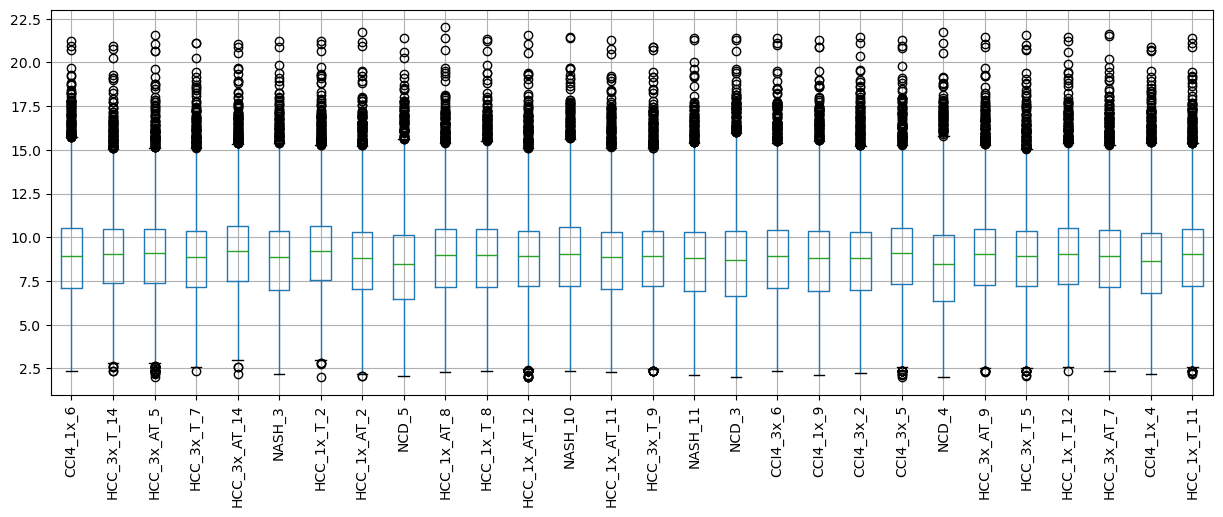

In [297]:
np.log2(cnt_filt2 + 1).boxplot(figsize=(15, 5))
plt.xticks(rotation=90);

In [310]:
cnt_filt2.describe()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
count,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,...,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04,1.465500e+04
mean,3.007657e+03,2.345545e+03,2.610418e+03,2.406401e+03,2.798377e+03,2.373865e+03,2.834919e+03,2.573980e+03,2.357139e+03,2.821995e+03,...,2.655636e+03,2.608835e+03,2.631494e+03,2.557155e+03,2.726717e+03,2.516801e+03,2.852801e+03,2.744170e+03,2.476104e+03,2.730762e+03
std,3.421844e+04,2.760687e+04,3.911612e+04,3.142709e+04,3.155558e+04,2.984695e+04,3.437003e+04,4.037571e+04,3.119180e+04,4.685241e+04,...,3.404756e+04,3.564435e+04,3.404522e+04,3.893889e+04,3.693304e+04,3.909751e+04,3.745110e+04,4.106262e+04,2.875908e+04,3.671114e+04
min,4.000000e+00,4.000000e+00,3.080000e+00,4.000000e+00,3.550000e+00,3.580000e+00,3.040000e+00,3.100000e+00,3.130000e+00,3.890000e+00,...,3.410000e+00,3.690000e+00,3.090000e+00,3.010000e+00,3.990000e+00,3.130000e+00,4.000000e+00,4.000000e+00,3.510000e+00,3.570000e+00
25%,1.349450e+02,1.640000e+02,1.690000e+02,1.400000e+02,1.830000e+02,1.270000e+02,1.870000e+02,1.290000e+02,8.595500e+01,1.430000e+02,...,1.200000e+02,1.255400e+02,1.590000e+02,7.923500e+01,1.550000e+02,1.479700e+02,1.590000e+02,1.420000e+02,1.108200e+02,1.490000e+02
50%,4.920000e+02,5.210000e+02,5.470000e+02,4.750000e+02,5.900000e+02,4.670000e+02,5.950000e+02,4.560000e+02,3.580000e+02,5.040000e+02,...,4.520000e+02,4.420000e+02,5.410000e+02,3.500000e+02,5.300000e+02,4.870000e+02,5.320000e+02,4.940000e+02,4.050600e+02,5.190000e+02
75%,1.489000e+03,1.403000e+03,1.443275e+03,1.289000e+03,1.604500e+03,1.313500e+03,1.595000e+03,1.271000e+03,1.105000e+03,1.409515e+03,...,1.320500e+03,1.248015e+03,1.460620e+03,1.104000e+03,1.432000e+03,1.307500e+03,1.504095e+03,1.348710e+03,1.223500e+03,1.436500e+03
max,2.479710e+06,2.040568e+06,3.089510e+06,2.286011e+06,2.173412e+06,2.455585e+06,2.432496e+06,3.430145e+06,2.774562e+06,4.260763e+06,...,2.574762e+06,2.832191e+06,2.506701e+06,3.485479e+06,2.902298e+06,3.120287e+06,2.837155e+06,3.280136e+06,1.921278e+06,2.795254e+06


In [358]:
def MADFilter(cnt_df):
    crit_p = cnt_df.median() + 3*mad(cnt_df)
    crit_n = cnt_df.median() - 3*mad(cnt_df)
    
    return cnt_df[((cnt_df >= crit_n) & (cnt_df <= crit_p)).sum(axis=1) == 28]

In [360]:
cf2_mad = MADFilter(cnt_filt2)

In [316]:
cf2_mad.describe()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
count,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,...,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000
mean,429.913013,448.698011,469.505676,400.984815,504.252344,400.260213,505.242060,386.460358,314.314899,430.317722,...,390.524841,382.904659,458.768617,312.888340,445.797875,416.815230,454.086797,416.107182,354.717463,439.821265
std,427.544842,415.274615,440.640030,375.123059,467.329637,391.071369,463.785422,370.310256,323.851159,414.491038,...,388.702323,371.910412,432.894588,331.783824,417.228994,393.770204,430.119500,394.096897,352.453694,419.188766
min,4.000000,4.000000,3.080000,4.000000,3.550000,3.580000,3.040000,3.100000,3.130000,3.890000,...,3.410000,3.690000,3.090000,3.010000,3.990000,3.130000,4.000000,4.000000,3.510000,3.570000
25%,88.035000,114.000000,113.000000,92.000000,125.000000,82.000000,126.000000,83.000000,55.060000,93.555000,...,80.000000,84.000000,105.985000,50.490000,103.000000,96.700000,103.095000,94.000000,75.000000,98.000000
50%,273.000000,312.000000,330.000000,275.000000,347.000000,261.000000,351.080000,260.000000,188.780000,289.000000,...,248.000000,251.360000,318.000000,179.000000,305.000000,286.000000,308.000000,283.000000,222.850000,296.000000
75%,651.500000,672.000000,703.135000,612.105000,760.940000,616.000000,767.000000,593.990000,485.000000,660.285000,...,596.000000,585.060000,699.070000,484.000000,683.000000,631.385000,685.000000,639.000000,536.000000,674.520000
max,2041.840000,2100.950000,2233.000000,1887.000000,2327.000000,1946.000000,2370.000000,1882.130000,1533.000000,2097.760000,...,1883.000000,1816.000000,2209.000000,1512.000000,2104.000000,1981.000000,2082.000000,1993.740000,1669.000000,2136.000000


<AxesSubplot: >

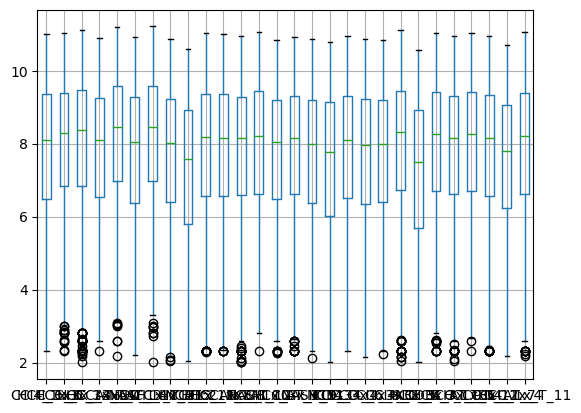

In [318]:
np.log2(cf2_mad+1).boxplot()

In [553]:
def CalculateTPM(cnt_df: pd.DataFrame, len_df: pd.DataFrame) -> pd.DataFrame:
    common_idx = set(cnt_df.index) & set(len_df.index)
    cnt = cnt_df.loc[list(common_idx), :]
    length = len_df.loc[list(common_idx)]

    rpk = cnt.div(length.values, axis=0) * 1e3
    
    tpm = rpk.div(rpk.sum().values) * 1e6
    
    return tpm

In [557]:
cf2_tpm2 = CalculateTPM(cf2_mad, length)

In [558]:
cf2_tpm2.sum()

CCI4_1x_6       1000000.0
HCC_3x_T_14     1000000.0
HCC_3x_AT_5     1000000.0
HCC_3x_T_7      1000000.0
HCC_3x_AT_14    1000000.0
NASH_3          1000000.0
HCC_1x_T_2      1000000.0
HCC_1x_AT_2     1000000.0
NCD_5           1000000.0
HCC_1x_AT_8     1000000.0
HCC_1x_T_8      1000000.0
HCC_1x_AT_12    1000000.0
NASH_10         1000000.0
HCC_1x_AT_11    1000000.0
HCC_3x_T_9      1000000.0
NASH_11         1000000.0
NCD_3           1000000.0
CCI4_3x_6       1000000.0
CCI4_1x_9       1000000.0
CCI4_3x_2       1000000.0
CCI4_3x_5       1000000.0
NCD_4           1000000.0
HCC_3x_AT_9     1000000.0
HCC_3x_T_5      1000000.0
HCC_1x_T_12     1000000.0
HCC_3x_AT_7     1000000.0
CCI4_1x_4       1000000.0
HCC_1x_T_11     1000000.0
dtype: float64

In [603]:
np.mean((np.log2(cf2_tpm2+1)).quantile(q=0.25)) - 2*np.std((np.log2(cf2_tpm2+1)).quantile(q=0.25)), \
np.mean((np.log2(cf2_tpm2+1)).quantile(q=0.25)) + 2*np.std((np.log2(cf2_tpm2+1)).quantile(q=0.25))

(4.00230051725216, 4.611835117333134)

In [592]:
(np.log2(cf2_tpm2+1)).quantile(q=0.25).sort_values(ascending=True)

NCD_4           3.867444
NCD_3           3.959057
NCD_5           4.001472
CCI4_1x_6       4.220604
NASH_10         4.226357
NASH_3          4.238768
HCC_1x_AT_8     4.249286
CCI4_1x_9       4.263922
HCC_1x_AT_2     4.266282
CCI4_1x_4       4.280437
HCC_1x_T_8      4.293349
NASH_11         4.293506
CCI4_3x_6       4.305554
HCC_3x_AT_7     4.328166
CCI4_3x_2       4.334281
HCC_3x_T_5      4.338458
HCC_1x_T_12     4.356307
HCC_1x_T_11     4.360171
HCC_3x_T_7      4.364844
HCC_3x_AT_9     4.371182
HCC_1x_AT_12    4.396959
HCC_1x_AT_11    4.418279
CCI4_3x_5       4.436706
HCC_3x_T_9      4.455240
HCC_3x_AT_5     4.459736
HCC_1x_T_2      4.479687
HCC_3x_AT_14    4.489563
HCC_3x_T_14     4.542285
Name: 0.25, dtype: float64

In [601]:
np.mean((np.log2(cf2_tpm2+1)).quantile(q=0.75)) - 2*np.std((np.log2(cf2_tpm2+1)).quantile(q=0.75)), \
np.mean((np.log2(cf2_tpm2+1)).quantile(q=0.75)) + 2*np.std((np.log2(cf2_tpm2+1)).quantile(q=0.75))

(6.8484986623643955, 6.917205180684428)

In [600]:
(np.log2(cf2_tpm2+1)).quantile(q=0.75).sort_values(ascending=True)

HCC_3x_T_5      6.848615
NASH_10         6.857372
HCC_1x_T_12     6.860124
HCC_1x_AT_8     6.861389
HCC_1x_T_2      6.864983
HCC_1x_AT_2     6.867894
HCC_1x_AT_12    6.868612
HCC_3x_AT_7     6.869741
HCC_1x_T_11     6.874848
NCD_3           6.874970
NCD_4           6.876643
HCC_3x_AT_9     6.877086
HCC_3x_AT_5     6.878710
NASH_11         6.880471
HCC_1x_T_8      6.882033
CCI4_1x_6       6.884360
HCC_3x_T_14     6.885654
HCC_3x_T_7      6.888828
HCC_3x_T_9      6.891286
HCC_3x_AT_14    6.893670
NASH_3          6.895414
HCC_1x_AT_11    6.895994
CCI4_3x_6       6.897662
CCI4_3x_5       6.900047
NCD_5           6.906028
CCI4_1x_4       6.906301
CCI4_3x_2       6.912631
CCI4_1x_9       6.918488
Name: 0.75, dtype: float64

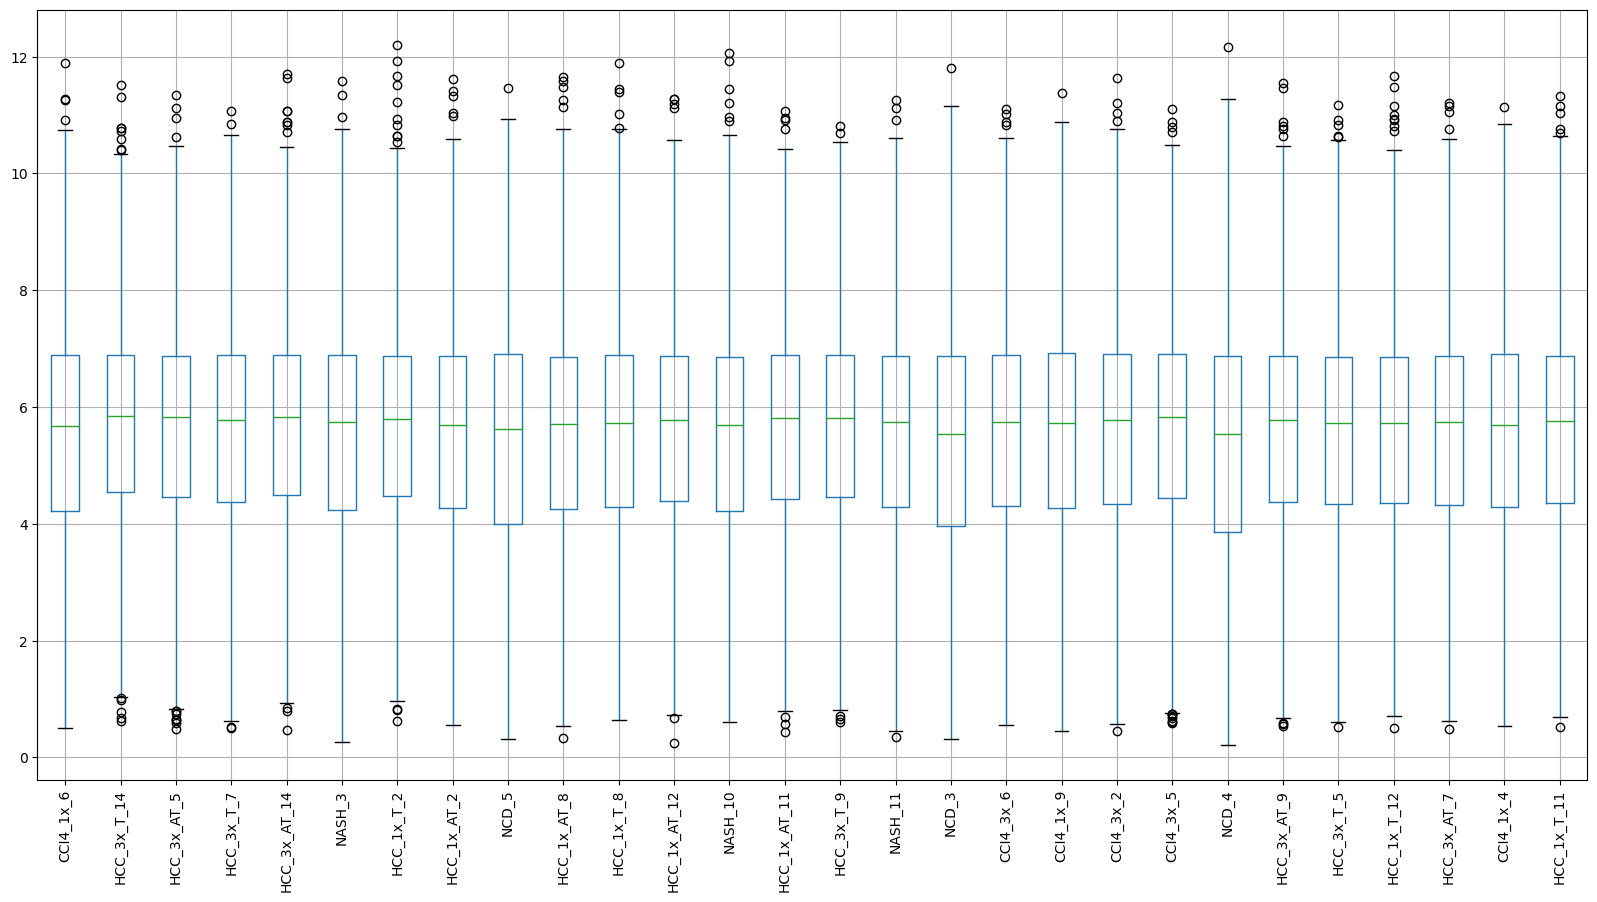

In [559]:
np.log2(cf2_tpm2+1).boxplot(figsize=(20, 10))
plt.xticks(rotation=90);

/Users/jigsaw-0/mambaforge/envs/ML/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


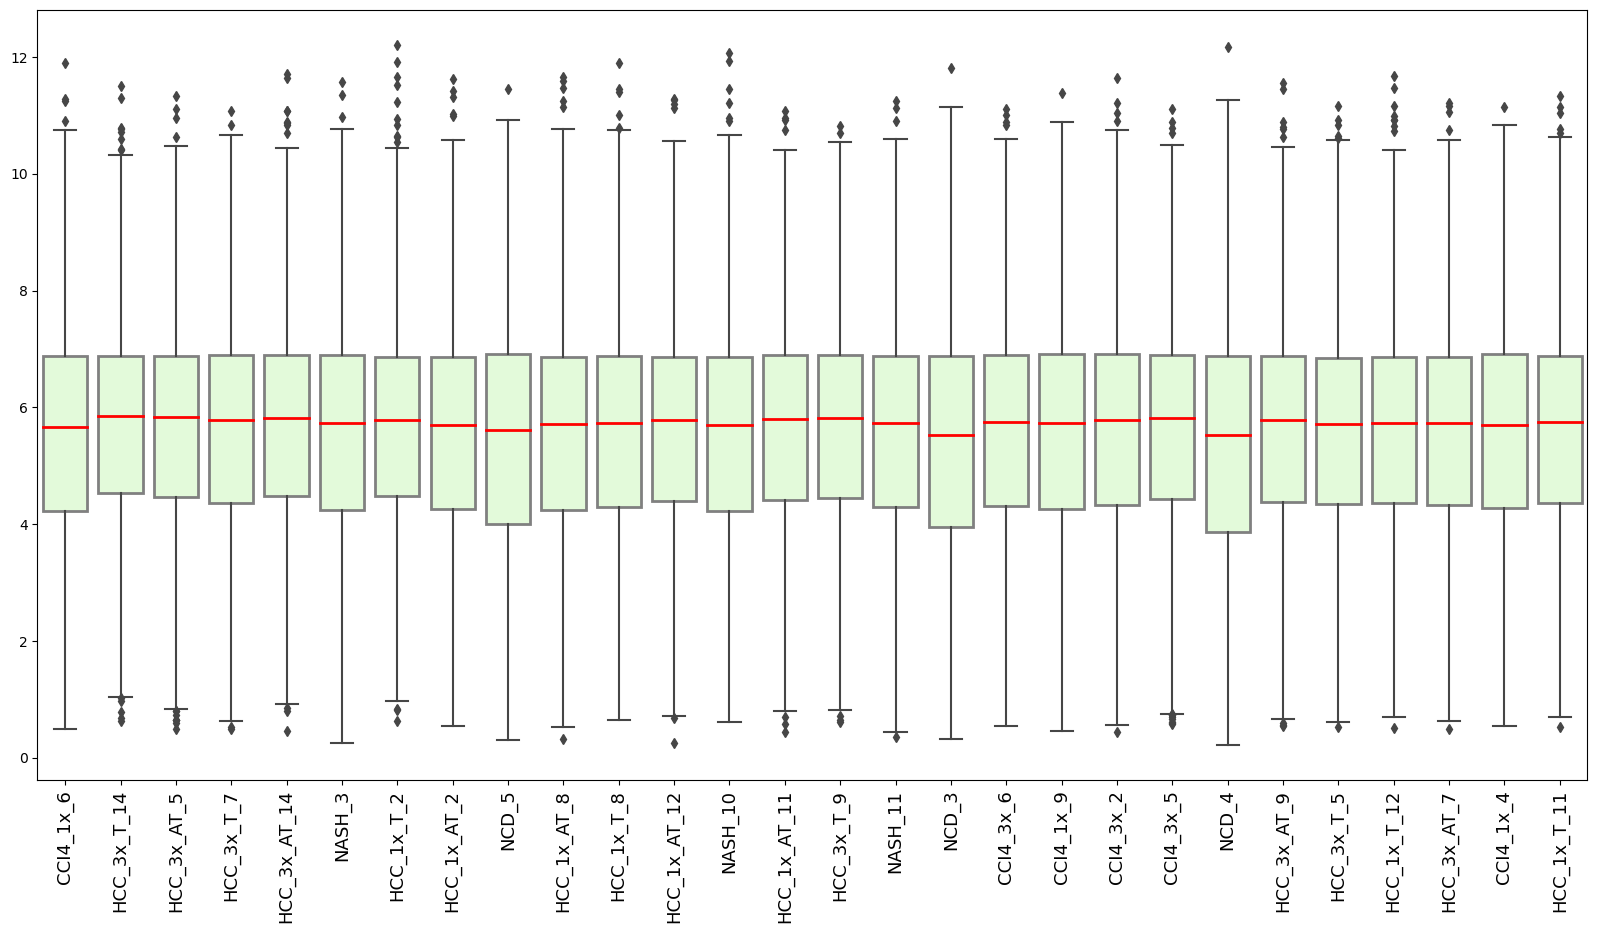

In [589]:
plt.figure(figsize=(20, 10))
#plt.ylim([3.7, 7.2])
plt.xticks(rotation=90, fontsize=13)
boxpl = sns.boxplot(data = np.log2(cf2_tpm2+1), 
                    boxprops={'edgecolor':'grey', 'facecolor': '#E3FADA', 'linewidth':2},
                    medianprops={'color':'red', 'linewidth':2});

/Users/jigsaw-0/mambaforge/envs/ML/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


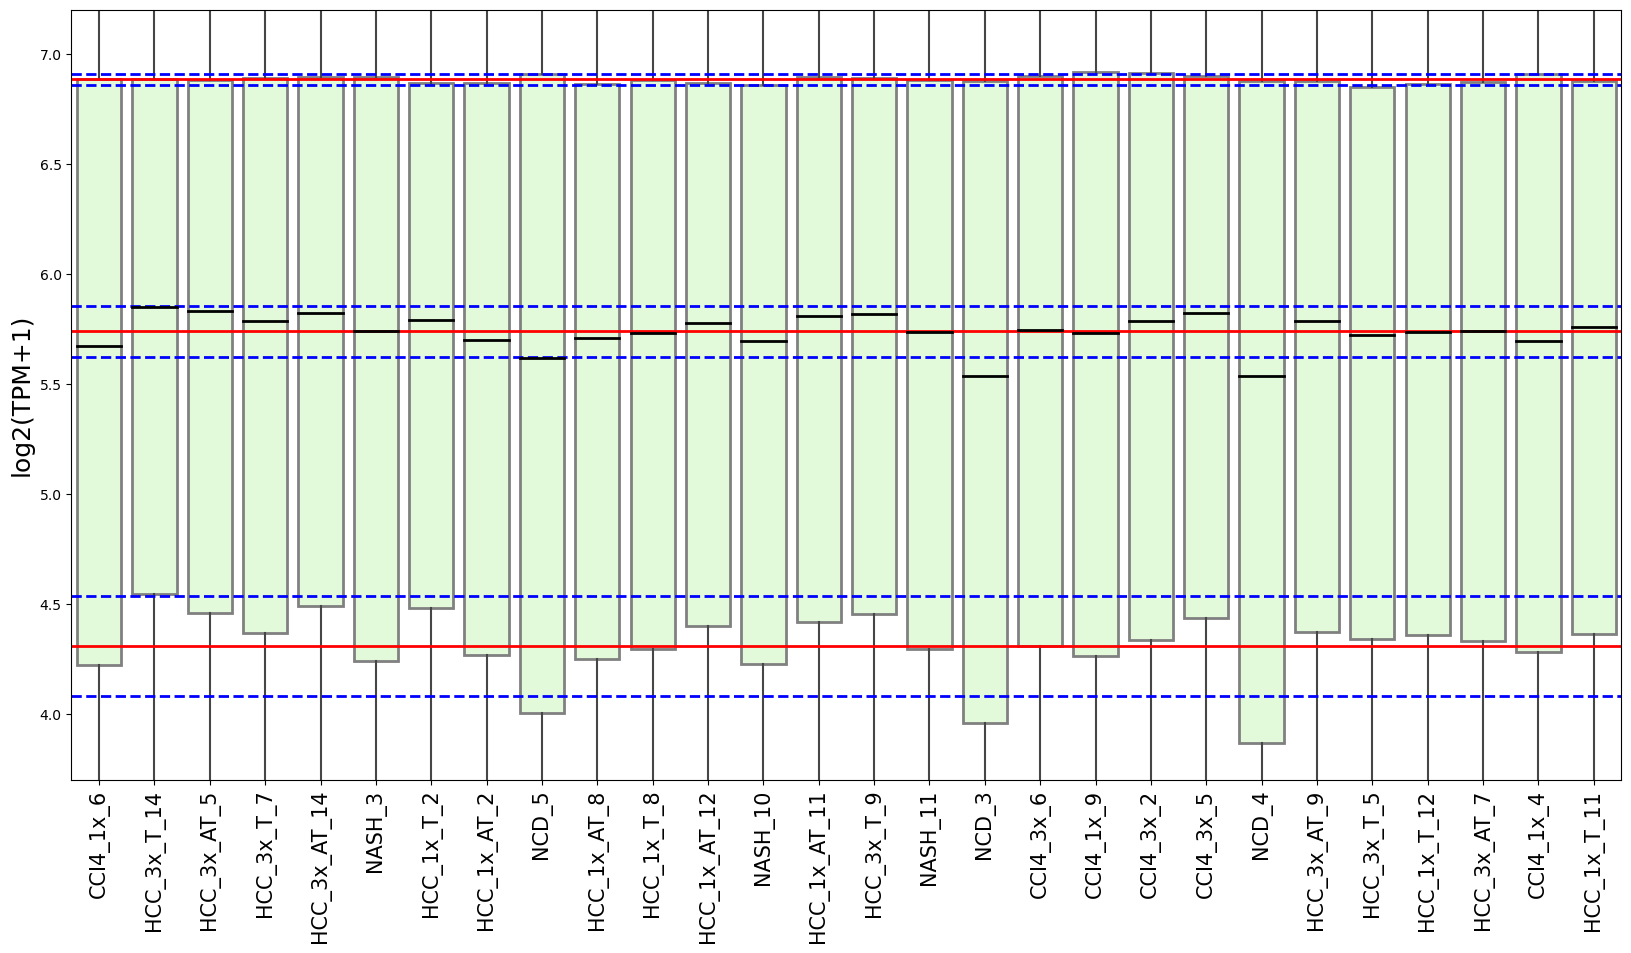

In [605]:
mean_median = np.mean(np.log2(cf2_tpm2+1).median())
std_median = np.std(np.log2(cf2_tpm2+1).median())

mean_q75 = np.mean(np.log2(cf2_tpm2+1).quantile(q=0.75))
std_q75 = np.std(np.log2(cf2_tpm2+1).quantile(q=0.75))

mean_q25 = np.mean(np.log2(cf2_tpm2+1).quantile(q=0.25))
std_q25 = np.std(np.log2(cf2_tpm2+1).quantile(q=0.25))

plt.figure(figsize=(20, 10))

sns.boxplot(data = np.log2(cf2_tpm2+1), 
            boxprops={'edgecolor':'grey', 'facecolor': '#E3FADA', 'linewidth':2},
            medianprops={'color':'black', 'linewidth':2})

plt.ylim([3.7, 7.2])
plt.ylabel("log2(TPM+1)", fontsize=18)
plt.xticks(rotation=90, fontsize=15)

plt.axhline(mean_median, color='red', linewidth=2)
plt.axhline(mean_median + 1.5*std_median, color='blue', linewidth=2, linestyle='--')
plt.axhline(mean_median - 1.5*std_median, color='blue', linewidth=2, linestyle='--')

plt.axhline(mean_q75, color='red', linewidth=2)
plt.axhline(mean_q75 + 1.5*std_q75, color='blue', linewidth=2, linestyle='--')
plt.axhline(mean_q75 - 1.5*std_q75, color='blue', linewidth=2, linestyle='--')

plt.axhline(mean_q25, color='red', linewidth=2)
plt.axhline(mean_q25 + 1.5*std_q25, color='blue', linewidth=2, linestyle='--')
plt.axhline(mean_q25 - 1.5*std_q25, color='blue', linewidth=2, linestyle='--')

plt.show()

In [130]:
cnt['length'] = length
filtered_cnt = cnt[(cnt.iloc[:, :-1] > 5).sum(axis=1) > 14]

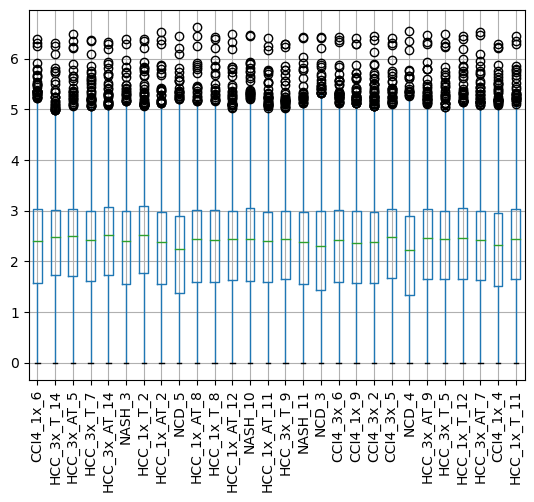

In [176]:
np.log10(filtered_cnt.iloc[:, :-1]+1).boxplot()
plt.xticks(rotation=90);

In [153]:
print(cnt.shape)
print(filtered_cnt.shape)

(55414, 29)
(18723, 29)


In [131]:
filtered_cnt.head()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11,length
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001.5,6183.0,5080.0,4472.0,4622.0,5769.0,4420.0,5278.0,3841.0,3875.0,4724.0,...,3293.0,3704.0,3527.0,4715.0,5048.0,5853.0,4204.0,3951.0,4690.0,3262.00
ENSMUSG00000000028.16,99.0,75.0,56.0,80.0,97.0,49.0,81.0,51.0,55.0,100.0,...,57.0,137.0,82.0,106.0,79.0,81.0,100.0,104.0,74.0,1860.91
ENSMUSG00000000031.17,4982.0,14815.0,7907.0,1664.0,5435.0,42.0,5069.0,5509.0,0.0,552.0,...,58.0,135.0,11.0,4102.0,7528.0,1969.0,1058.0,106.0,25100.0,2072.07
ENSMUSG00000000049.12,65819.0,37488.0,36706.0,44460.0,46210.0,41466.0,49518.0,50986.0,57500.0,51631.0,...,49562.0,39776.0,65986.0,55478.0,40121.0,51357.0,53702.0,55236.0,56261.0,1190.00
ENSMUSG00000000056.8,3269.0,1749.0,1355.0,1527.0,2120.0,2190.0,2623.0,2689.0,1751.0,2171.0,...,2354.0,3158.0,1608.0,2052.0,1881.0,2818.0,1901.0,2623.0,2335.0,3821.24


In [161]:
cnt_numpy = filtered_cnt.iloc[:, :-1].to_numpy()
len_numpy = filtered_cnt['length'].to_numpy()
len_numpy = len_numpy[:, np.newaxis]

In [162]:
rpk = cnt_numpy / len_numpy

In [163]:
rpk.shape

(18723, 28)

In [164]:
tpm = rpk / rpk.sum(axis=1)[:, np.newaxis] * 1e6

In [165]:
tpm_df = pd.DataFrame(tpm, index=filtered_cnt.index, columns=filtered_cnt.columns[:-1])

In [166]:
tpm_df.head()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001.5,48401.111589,39766.722768,35007.240988,36181.455243,45160.280246,34600.180046,41316.685585,30067.713022,30333.868253,36979.920936,...,27241.770715,25777.916944,28995.264003,27609.691182,36909.468081,39516.223727,45817.840229,32909.311519,30928.803476,36713.765705
ENSMUSG00000000028.16,44938.719927,34044.484793,25419.881979,36314.117113,44030.867000,22242.396732,36768.043577,23150.249660,24965.955515,45392.646391,...,12709.940990,25873.808443,62187.925556,37221.970041,48116.205175,35860.190649,36768.043577,45392.646391,47208.352247,33590.558330
ENSMUSG00000000031.17,46986.701877,139724.606244,74573.233990,15693.671602,51259.077620,396.114307,47807.224370,51956.993304,0.000000,5206.073753,...,2508.723946,547.014996,1273.224559,103.744223,38687.164010,70998.773932,18570.215977,9978.308026,999.717061,236725.455060
ENSMUSG00000000049.12,46748.274968,26626.040080,26070.620656,31577.938059,32820.884339,29451.434538,35170.407935,36213.062300,40839.663481,36671.176786,...,41206.865325,35201.659156,28251.103559,46866.887556,39403.527837,28496.141540,36476.566911,38142.114926,39231.646123,39959.657515
ENSMUSG00000000056.8,53443.850442,28593.849625,22152.467834,24964.441611,34659.211666,35803.619599,42882.600095,43961.613288,28626.546994,35492.994589,...,42735.461932,38484.803898,51629.146435,26288.685075,33547.501104,30751.876012,46070.593621,31078.849707,42882.600095,38174.178887


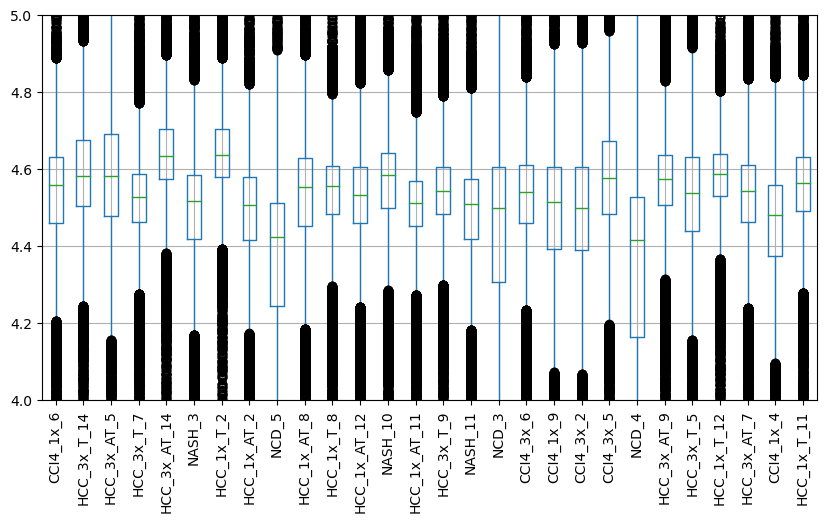

In [171]:
np.log10(tpm_df+1).boxplot(figsize=(10, 5))
plt.ylim([4, 5])
plt.xticks(rotation=90);

In [543]:
def MakeBoxplot(data: pd.DataFrame) -> None:
    plt.figure(figsize=(20, 10))
    plt.ylim([0, 0.0002])
    plt.ylabel("log2(TPM+1)", fontsize=18)
    plt.xticks(rotation=90, fontsize=15)

    mean_median = np.mean(np.log2(data+1).median())
    std_median = np.std(np.log2(data+1).median())

    mean_q75 = np.mean(np.log2(data+1).quantile(q=0.75))
    std_q75 = np.std(np.log2(data+1).quantile(q=0.75))

    mean_q25 = np.mean(np.log2(data+1).quantile(q=0.25))
    std_q25 = np.std(np.log2(data+1).quantile(q=0.25))
    
    sns.boxplot(data = np.log2(data+1), 
                boxprops={'edgecolor':'grey', 'facecolor': '#E3FADA', 'linewidth':2},
                medianprops={'color':'black', 'linewidth':2})

    plt.axhline(mean_median, color='red', linewidth=2)
    plt.axhline(mean_median + 1.5*std_median, color='blue', linewidth=2, linestyle='--')
    plt.axhline(mean_median - 1.5*std_median, color='blue', linewidth=2, linestyle='--')

    plt.axhline(mean_q75, color='red', linewidth=2)
    plt.axhline(mean_q75 + 1.5*std_q75, color='blue', linewidth=2, linestyle='--')
    plt.axhline(mean_q75 - 1.5*std_q75, color='blue', linewidth=2, linestyle='--')

    plt.axhline(mean_q25, color='red', linewidth=2)
    plt.axhline(mean_q25 + 1.5*std_q25, color='blue', linewidth=2, linestyle='--')
    plt.axhline(mean_q25 - 1.5*std_q25, color='blue', linewidth=2, linestyle='--')

    plt.show()

In [547]:
cnt_only_mad.head()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000003.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000103.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000183.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000215.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000263.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/Users/jigsaw-0/mambaforge/envs/ML/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


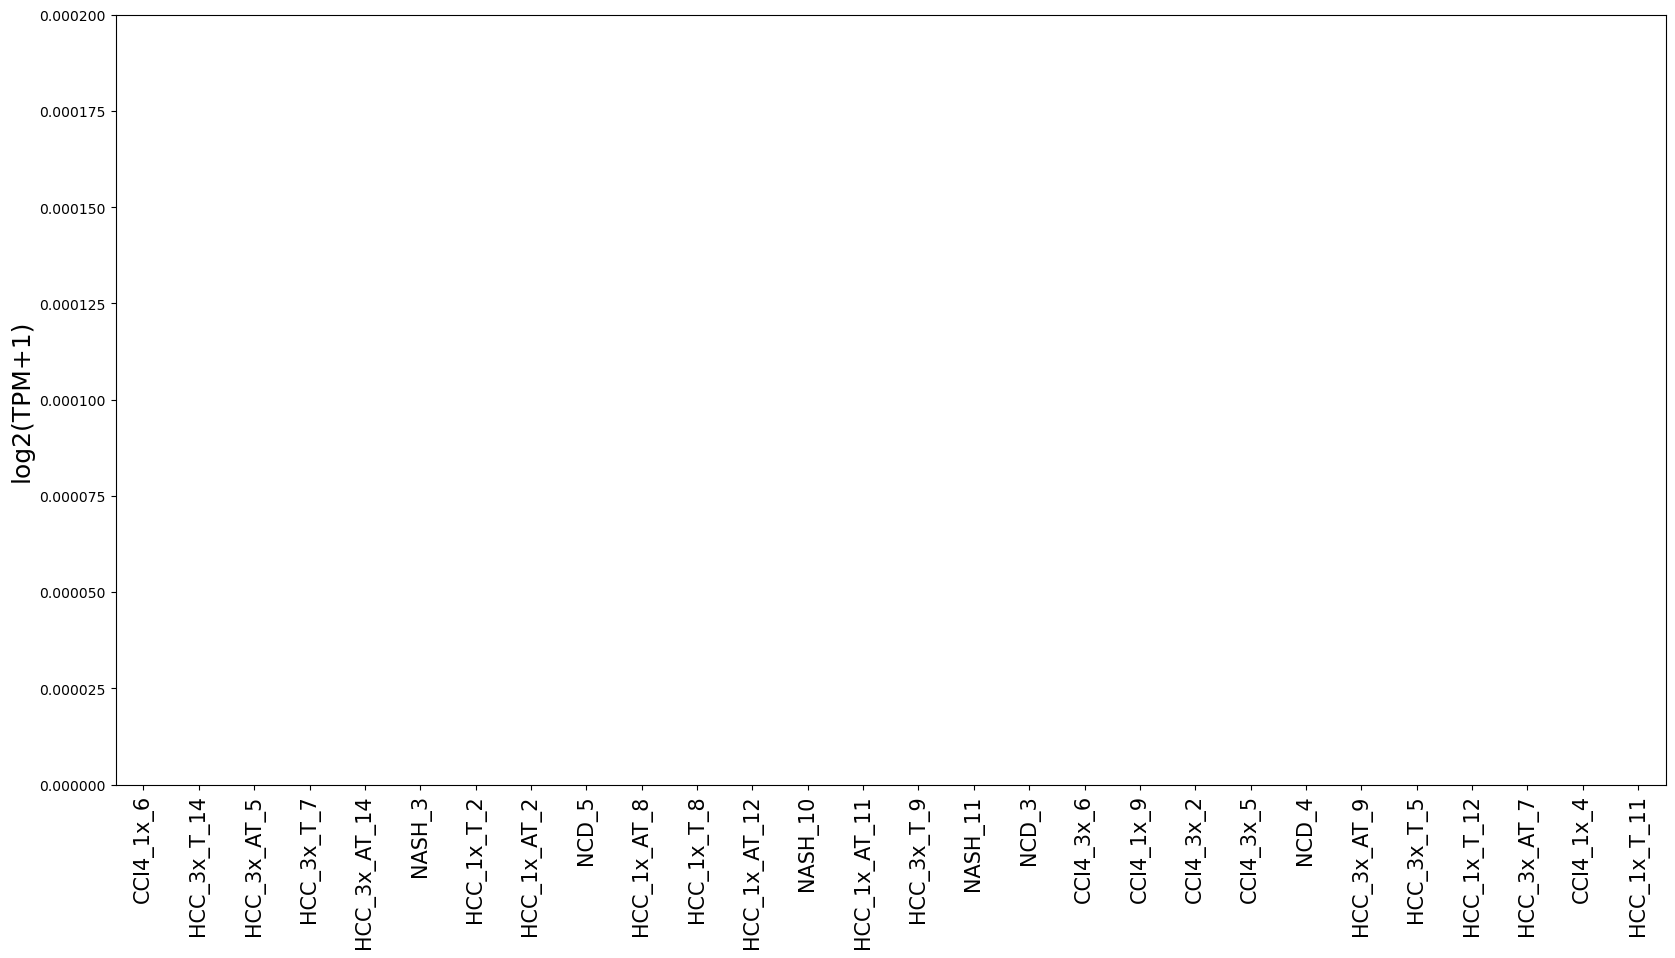

In [544]:
cnt_only_mad = MADFilter(cnt)
cnt_only_mad_tpm = CalculateTPM(cnt_only_mad, length)
MakeBoxplot(cnt_only_mad_tpm)

### Multi-Dimensional Scaling (MDS)

In [428]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(np.log2(cf2_tpm2+1).transpose())
pc_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pc_df['sample'] = ['_'.join(x.split('_')[:-1]) for x in cf2_tpm2.columns]
pc_df['group'] = [x.split('_')[0] for x in cf2_tpm2.columns]

In [426]:
pc_df

,PC1,PC2,sample
0,0.003188,0.000751,CCI4_1x
1,-0.002583,0.001306,HCC_3x_T
2,-0.004556,-0.000683,HCC_3x_AT
3,-0.001918,-0.001356,HCC_3x_T
4,-0.000499,0.003147,HCC_3x_AT
5,-0.000589,-0.000261,NASH
6,0.000349,0.005243,HCC_1x_T
7,-0.000958,0.000871,HCC_1x_AT
8,0.003181,-0.002524,NCD
9,-0.000361,0.001404,HCC_1x_AT


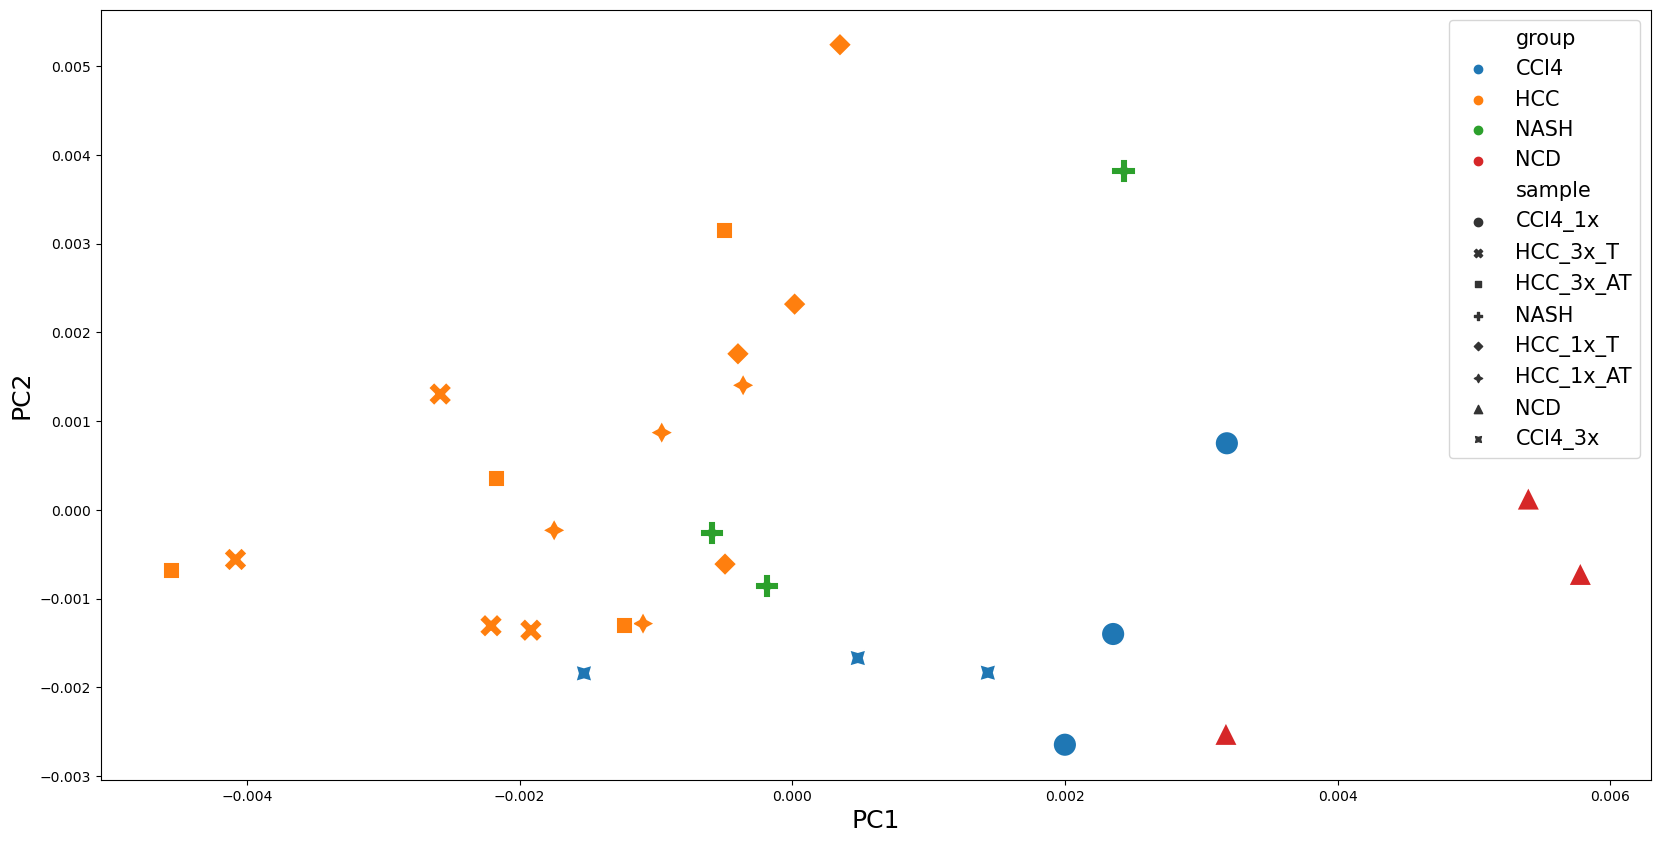

In [462]:
plt.figure(figsize=(20, 10))
plt.xlabel("PC1", size=18)
plt.ylabel("PC2", size=18)

pcapl = sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='group', style='sample', s=300);
pcapl.legend(fontsize=15)

plt.show()

#### What if we plot PCA with original data?

In [503]:
def MakePCA(data: pd.DataFrame) -> None:
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(np.log2(data+1).transpose())
    pc_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
    pc_df['sample'] = ['_'.join(x.split('_')[:-1]) for x in data.columns]
    pc_df['group'] = [x.split('_')[0] for x in data.columns]

    plt.figure(figsize=(20, 10))
    plt.xlabel("PC1", size=18)
    plt.ylabel("PC2", size=18)

    sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='group', style='sample', s=300);
    plt.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0, fontsize=15);

    plt.show()

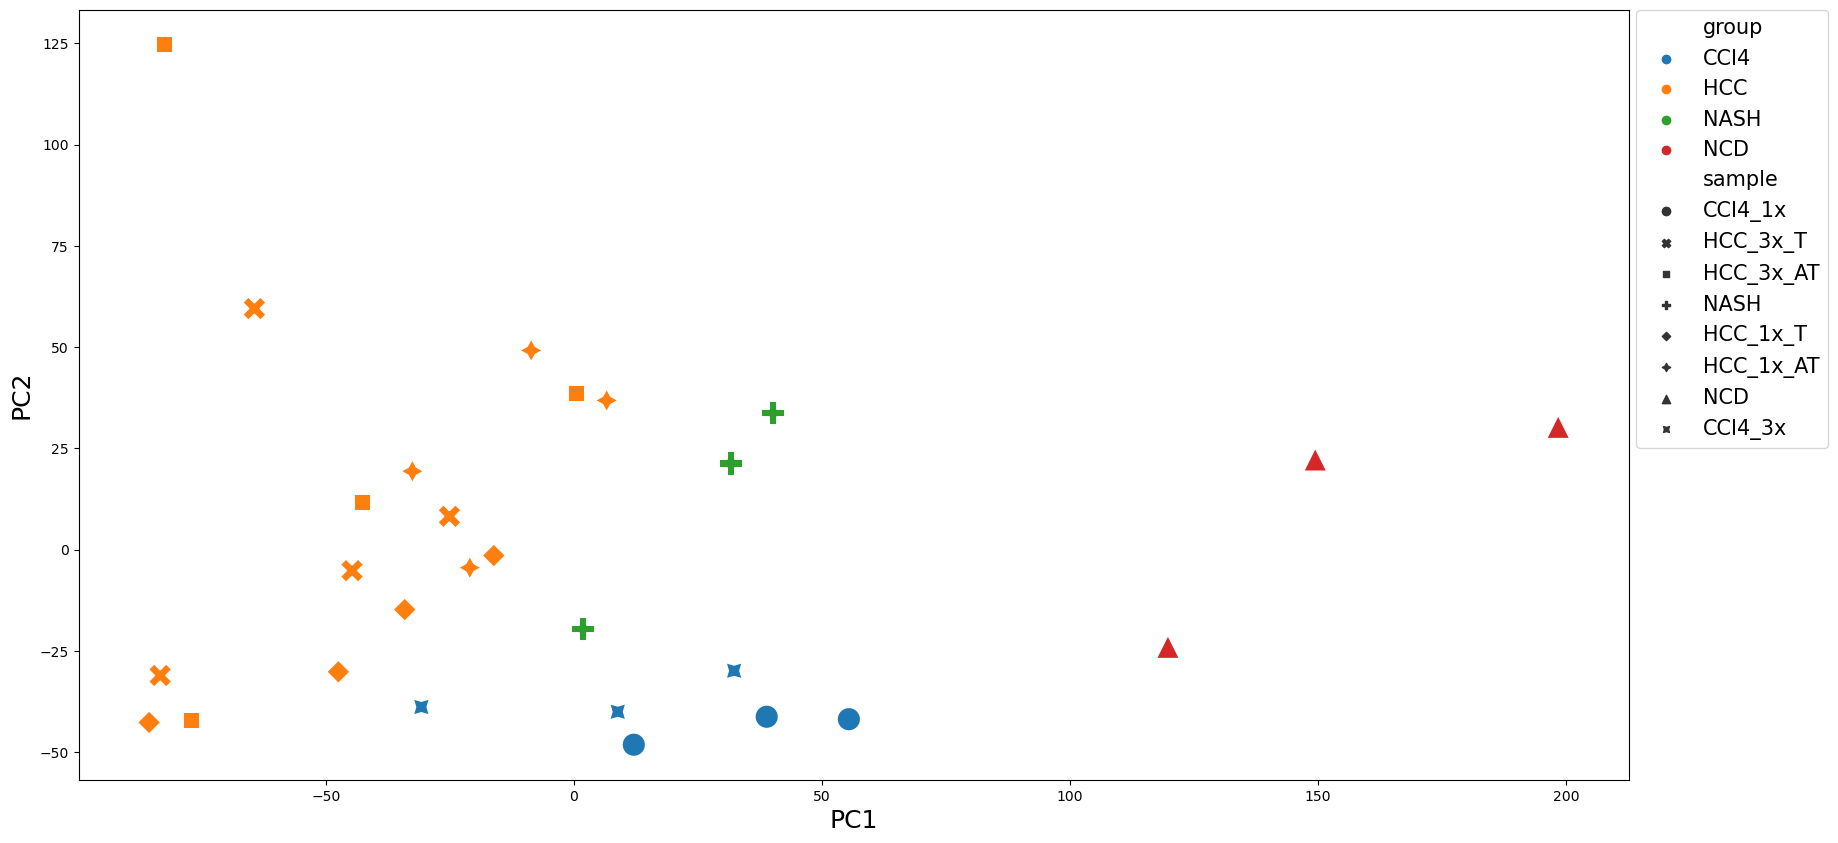

In [507]:
MakePCA(cnt)

In [467]:
cf2_tpm2.head()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000049988.6,0.000022,0.000044,0.000093,0.000076,0.000049,0.000090,0.000037,0.000080,0.000050,0.000029,...,0.000018,0.000046,0.000041,0.000024,0.000060,0.000062,0.000031,0.000070,0.000022,0.000041
ENSMUSG00000005043.14,0.000021,0.000022,0.000034,0.000024,0.000034,0.000039,0.000032,0.000029,0.000027,0.000036,...,0.000040,0.000037,0.000057,0.000010,0.000030,0.000030,0.000023,0.000030,0.000026,0.000030
ENSMUSG00000037890.14,0.000016,0.000027,0.000018,0.000022,0.000025,0.000016,0.000023,0.000020,0.000013,0.000018,...,0.000021,0.000020,0.000018,0.000014,0.000024,0.000017,0.000019,0.000021,0.000017,0.000022
ENSMUSG00000042035.12,0.000005,0.000008,0.000014,0.000005,0.000009,0.000004,0.000008,0.000006,0.000003,0.000005,...,0.000003,0.000007,0.000003,0.000002,0.000009,0.000009,0.000008,0.000007,0.000004,0.000005
ENSMUSG00000079465.9,0.000005,0.000010,0.000008,0.000004,0.000009,0.000003,0.000008,0.000004,0.000004,0.000006,...,0.000005,0.000004,0.000006,0.000004,0.000004,0.000006,0.000007,0.000005,0.000005,0.000004


In [532]:
def FindHighVariable(data: pd.DataFrame) -> pd.DataFrame:
    df_mean = data.mean(axis=1)
    df_std = data.std(axis=1)
    cv = df_mean.div(df_std).sort_values(ascending=False)
    
    return data.loc[cv.index[:round(len(cv)*0.25+1)], :]

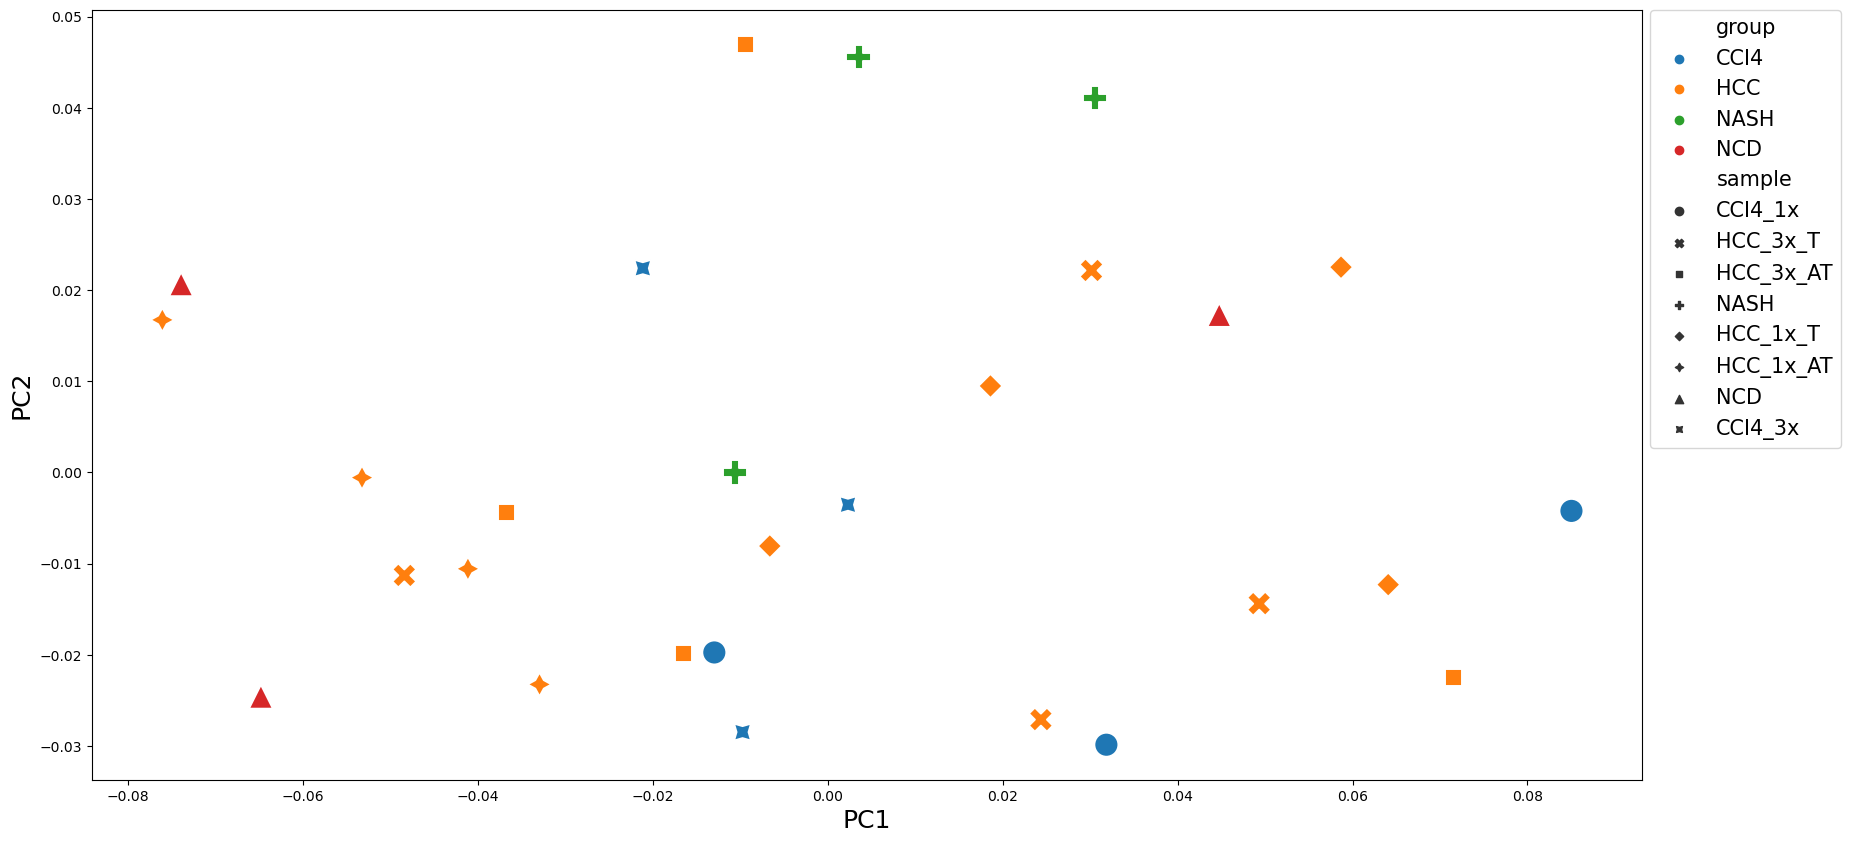

In [551]:
cnt_hv = FindHighVariable(cnt)
cnt_hv_tpm = CalculateTPM(cnt_hv, length)
MakePCA(cnt_hv_tpm)

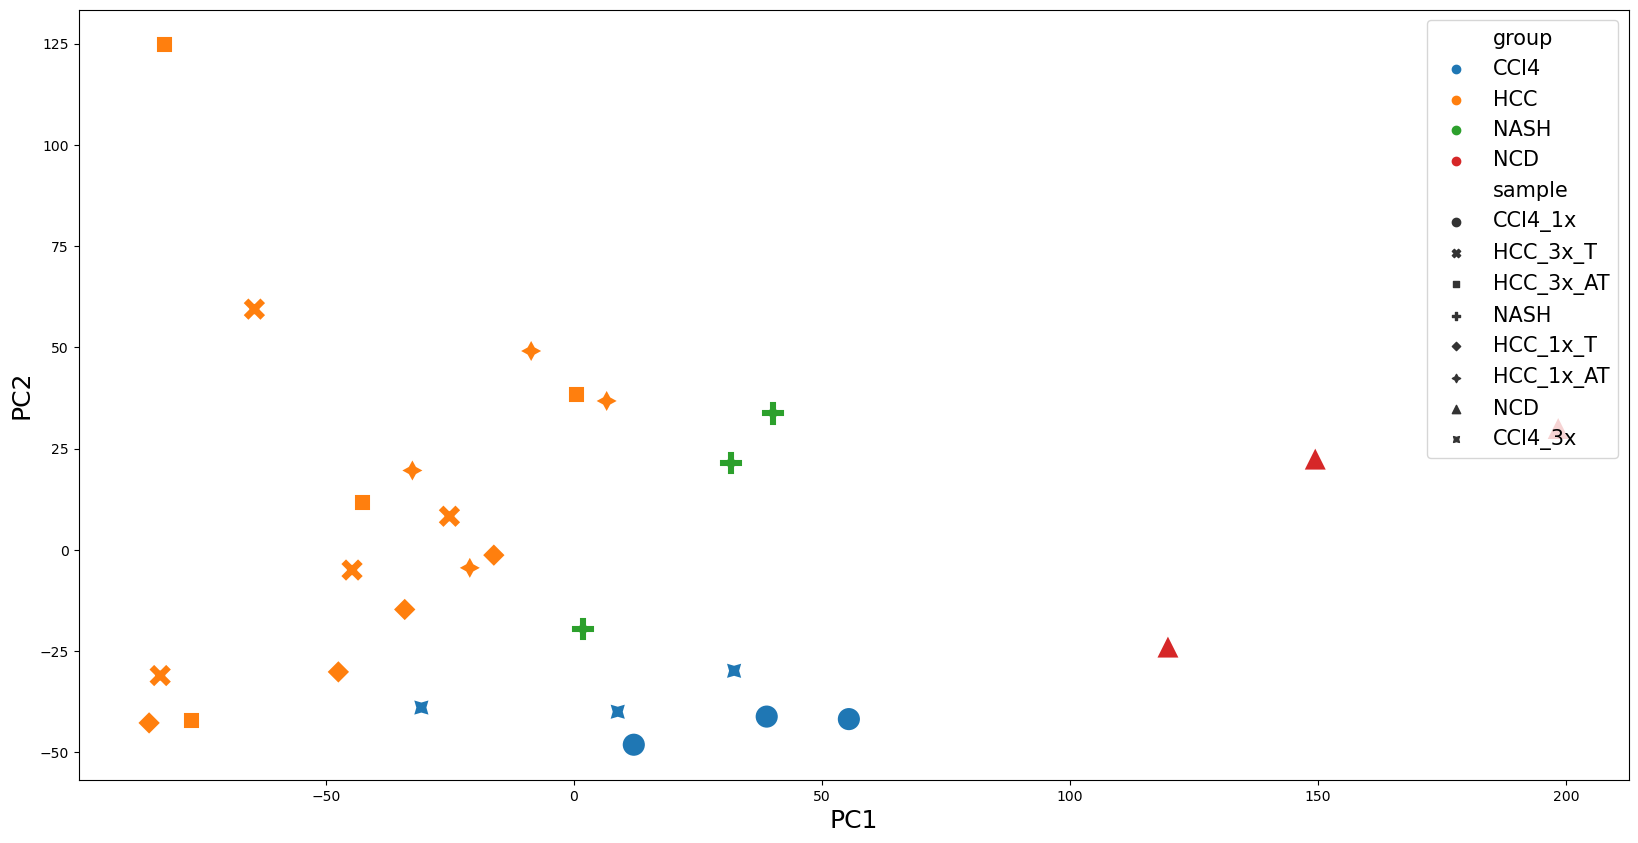

In [496]:
MakePCA(cnt)

In [533]:
test = FindHighVariable(cf2_mad)
test.shape

(2782, 28)

In [481]:
cf2_hv = FindHighVariable(cf2_mad)
cf2_hv_tpm = CalculateTPM(cf2_hv, length)

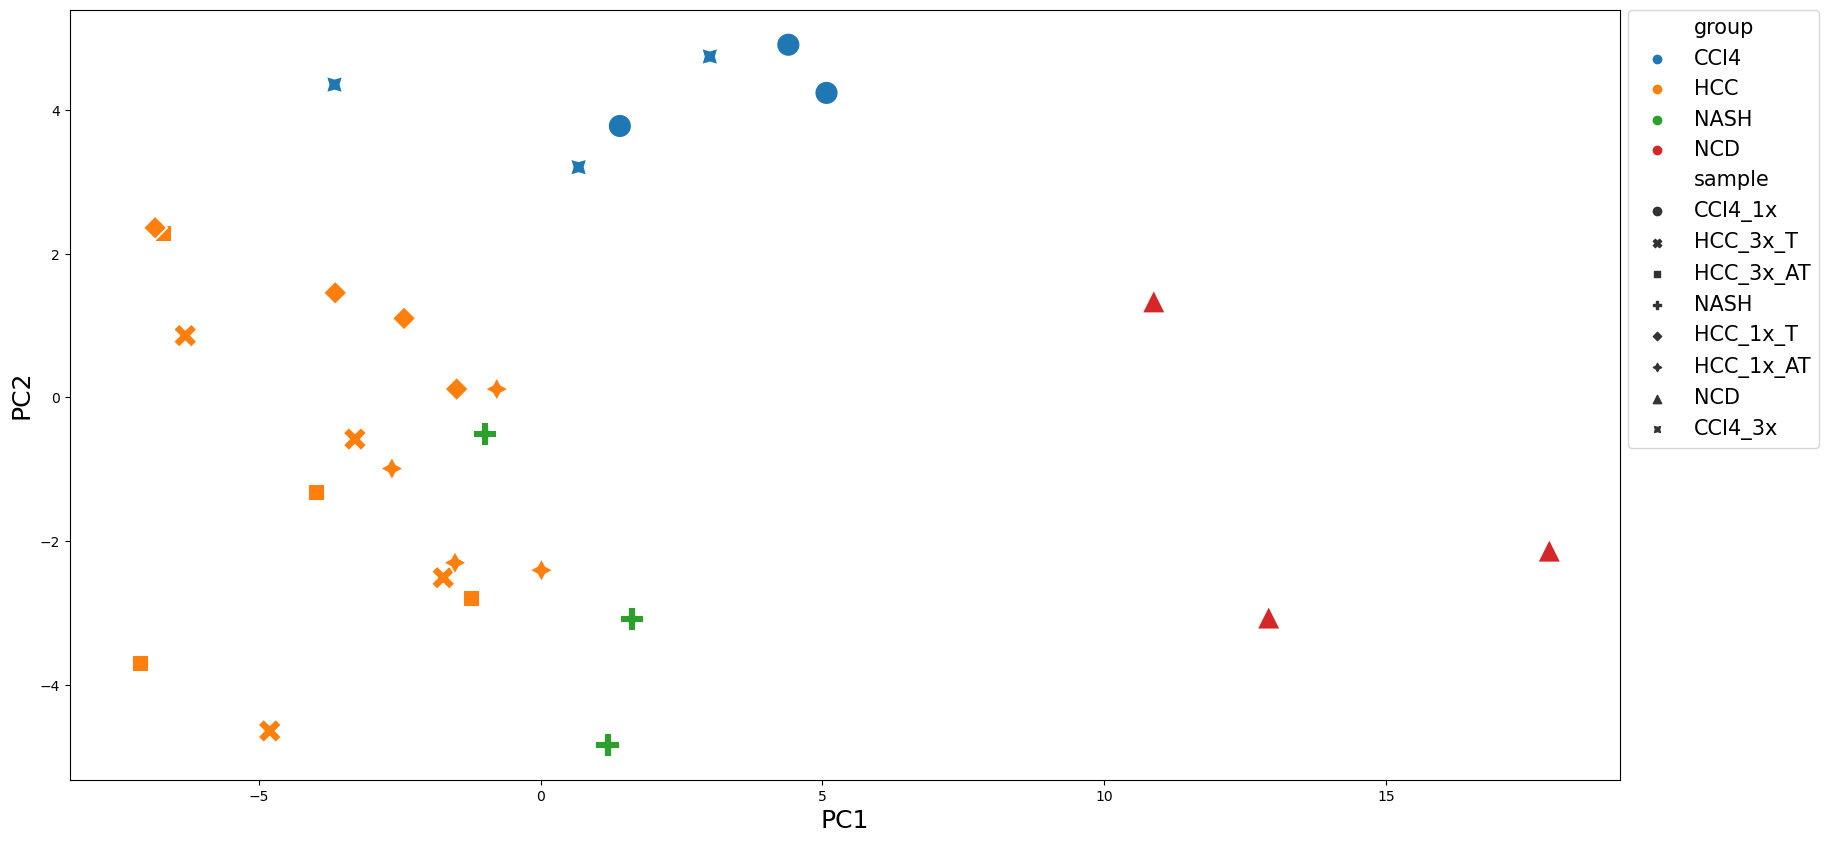

In [552]:
MakePCA(FindHighVariable(np.log2(cnt+1)))

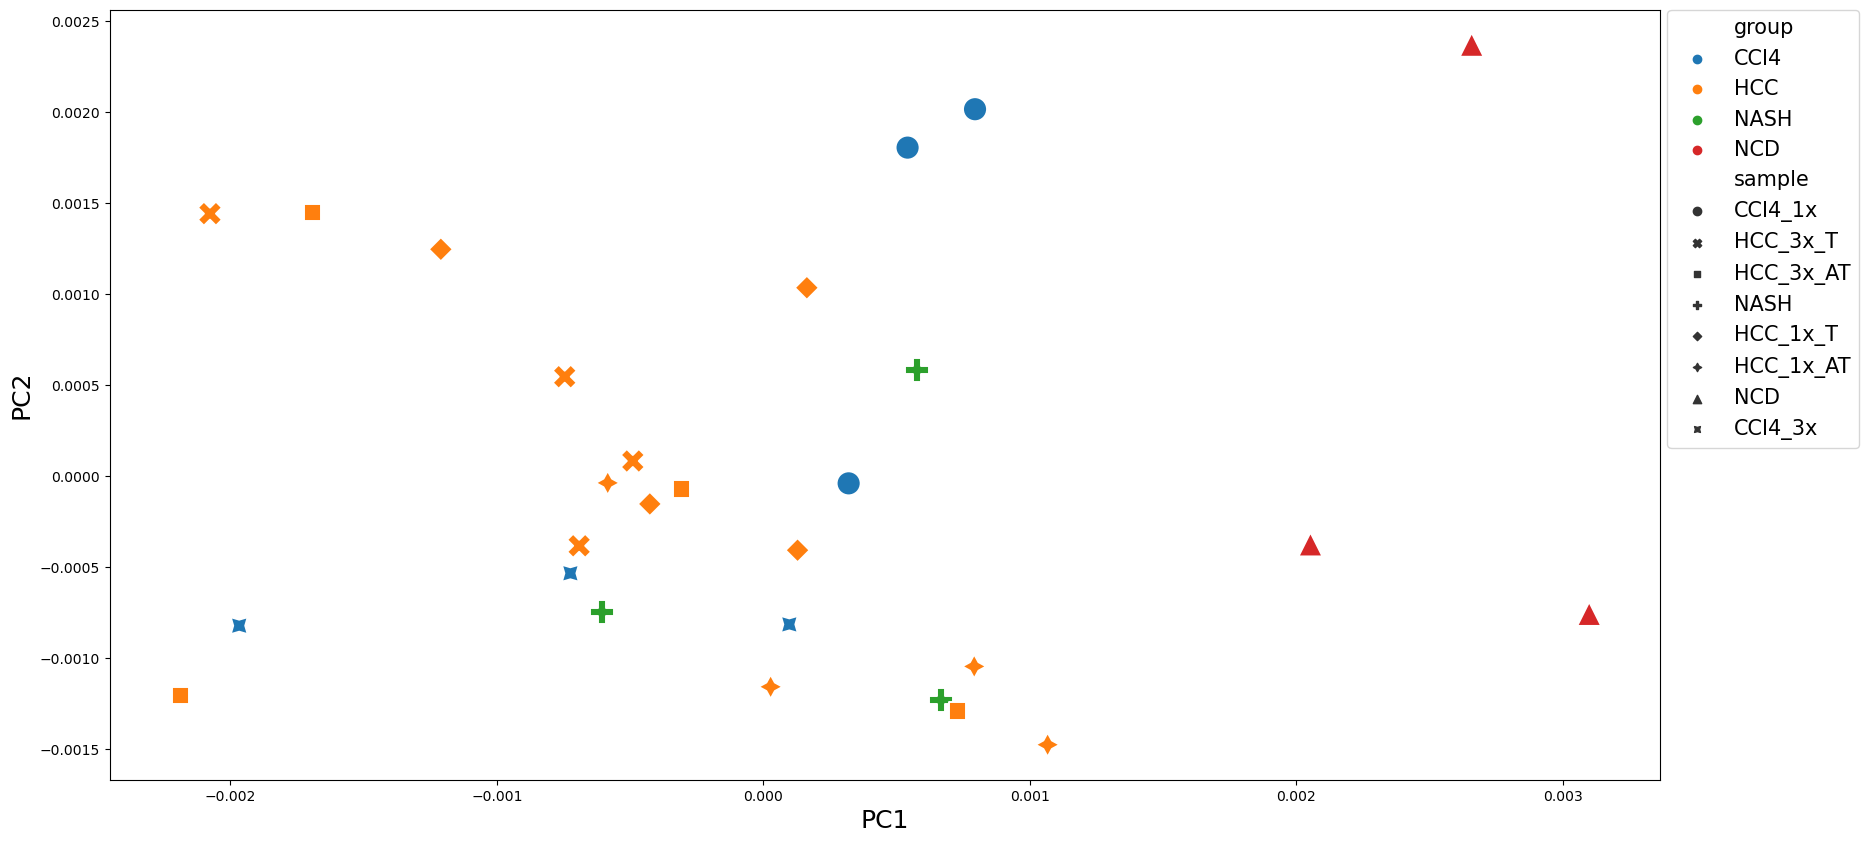

In [538]:
MakePCA(FindHighVariable(np.log2(cf2_tpm2+1)))

In [471]:
FindHighVariable(np.log2(tpm+1))

count    33573.000000
mean         2.101872
std          2.120457
min          0.188982
25%          0.422400
50%          1.285229
75%          3.238150
max         15.978622
dtype: float64


In [ ]:
def CalculateTPM(cnt_df: pd.DataFrame, len_df: pd.DataFrame) -> pd.DataFrame:
    common_idx = set(cnt_df.index) & set(len_df.index)
    cnt = cnt_df.loc[list(common_idx), :]
    length = len_df.loc[list(common_idx)]

    rpk = cnt.div(length.values, axis=0) * 1e3
    
    tpm = rpk.div(rpk.sum().values)
    
    return tpm

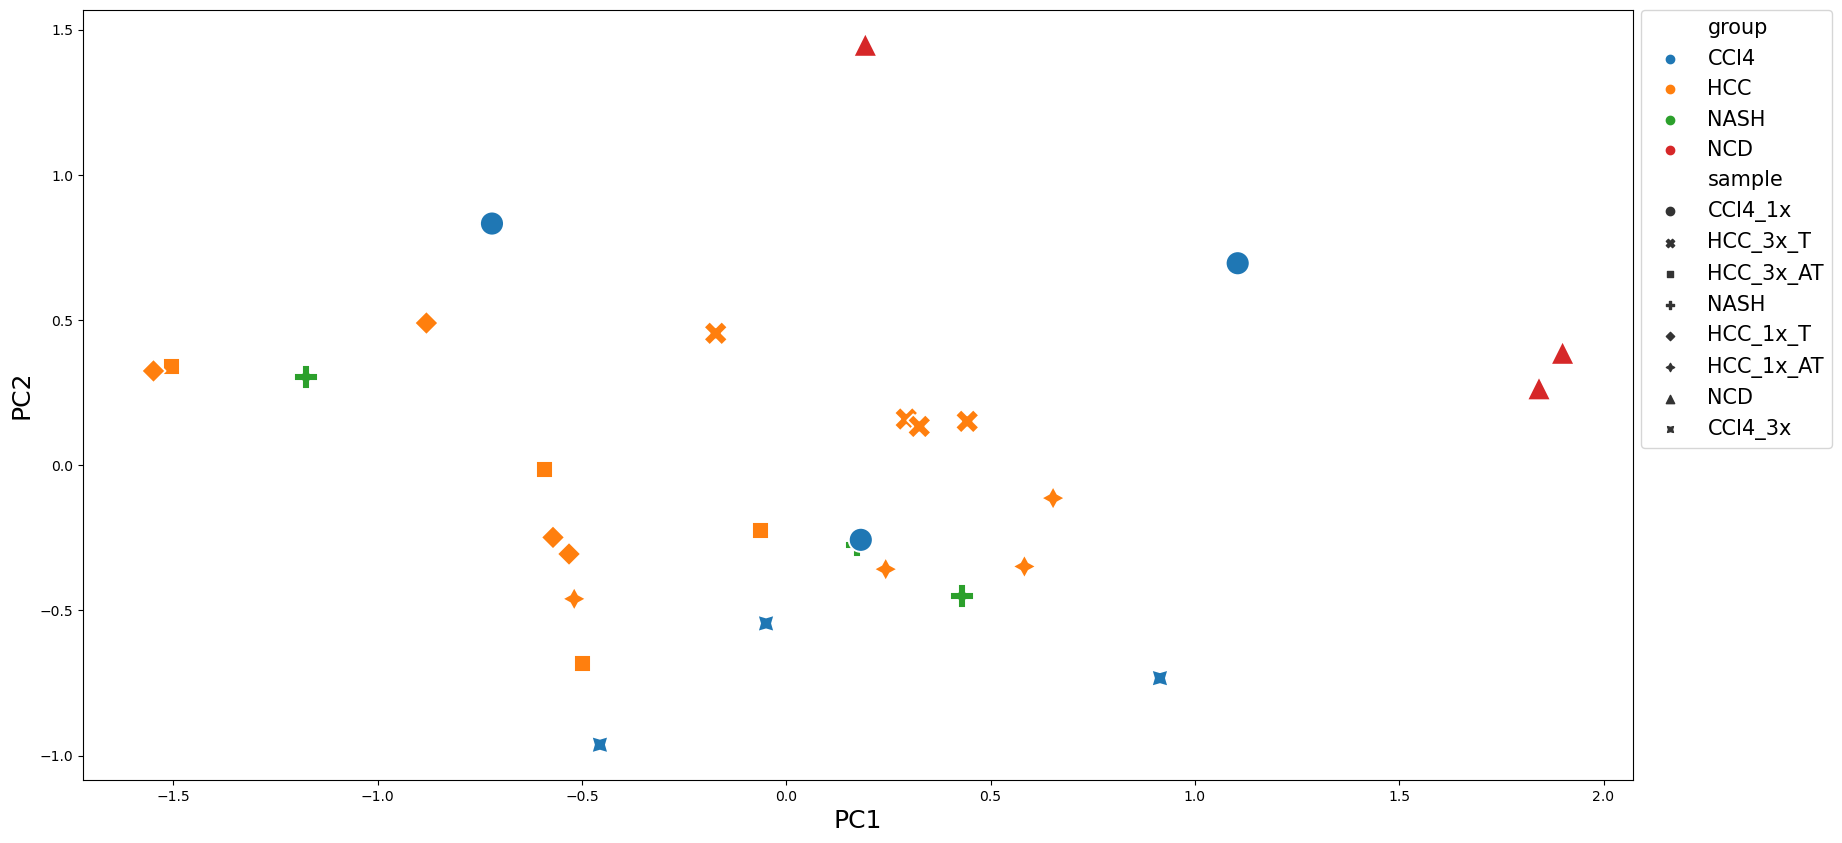

In [550]:
MakePCA(FindHighVariable(np.log2(cf2_mad+1)))

### Try other MDS plots